<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



# ***Análisis de Componentes Principales de Núcleo - Kernel Principal Component Analysis***

$ \ $

Los rumores dicen que la comunidad de ultra ricos está compuesta principalmente por banqueros de inversión o emprendedores de la industria tecnológica que abandonaron la universidad.

* ¿Es realmente cierto este estereotipo?

* ¿Alguna vez te has preguntado si los principales multimillonarios del mundo comparten algo en común?

Aunque no podemos afirmar con certeza lo que se necesita para ser uno de ellos, sí podemos intentar determinar si existen patrones entre las personas más ricas del mundo. En este cuaderno, explorarás el Análisis de Componentes Principales de Núcleo (Kernel PCA, por sus siglas en inglés), una extensión del análisis de componentes principales (PCA), para extraer patrones clave en conjuntos de datos que suelen tener dimensiones más altas. Además de analizar a los multimillonarios de todo el mundo, también utilizaremos esta técnica de aprendizaje no supervisado para eliminar el ruido en imágenes.


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/RichPeople.png)

$ \ $

-----

## ***Detalles adicionales***

- El análisis de componentes principales (PCA) es una técnica utilizada para reducir la dimensionalidad de conjuntos de datos mediante la identificación de las variables más importantes o características clave.

- El Análisis de Componentes Principales de Núcleo (Kernel PCA) es una extensión del PCA que utiliza funciones de kernel para mapear los datos a un espacio de mayor dimensionalidad antes de realizar el análisis de componentes principales. Esto permite capturar patrones no lineales en los datos.

- El objetivo del análisis de Kernel PCA en este cuaderno es encontrar patrones en los datos relacionados con la comunidad de ultra ricos y también en imágenes para su eliminacion de ruido.

- Al explorar el Kernel PCA, podrás analizar y visualizar los patrones clave extraídos de los datos, lo que puede proporcionar información interesante sobre los factores comunes entre los principales multimillonarios o ayudar en la eliminacion del ruido de imágenes.

- Este cuaderno utilizará técnicas de aprendizaje no supervisado, lo que significa que no se proporcionará información sobre las categorías o etiquetas de los datos. En cambio, se buscarán patrones y estructuras inherentes en los datos para obtener información útil.

$ \ $

-----

## ***Objectives***

$ \ $

After completing this lab, you will be able to:

* Understand why we transform a dataset to a higher dimension and apply PCA.

* Understand what is Kernel PCA.

* Apply Kernel PCA effectively to real world datasets for purposes ranging from prediction to visualization.

$ \ $

----

## ***Datasets***

$ \ $


Datasets for this lab are gathered from the [kaggle](https://www.kaggle.com/datasets/jjdaguirre/forbes-billionaires-2022?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the Public Domain License.

$ \ $

-----

## ***Installing required libraries***

$ \ $


The following required modules are pre-installed in the Skills Network Labs environment.

In [1]:
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
sns.set_context('notebook')
sns.set_style('white')

$ \ $

-----

## ***Defining Helper functions***

$ \ $

The following function will be usefull in this notebook.

In [4]:
# La función plot_proj toma como entrada una matriz de datos A, un vector de dirección u, un vector v que contiene las etiquetas de los datos y un parámetro opcional name para la etiqueta del gráfico.
def plot_proj(A, u, v, name = None):

    # Estas líneas generan un gráfico de dispersión con los puntos de datos de las coordenadas x e y (columnas 0 y 1 respectivamente) de la matriz A. Los puntos de datos se etiquetan como 'datos' en la leyenda del gráfico y se colorean según las etiquetas v utilizando el mapa de colores 'viridis'.
    # tomamos la primera y segunda columna de A
    x = A[:, 0]
    y = A[:, 1]
    plt.scatter(x, y, label = 'data', c = v, cmap = 'viridis')

    # x : Se genera una secuencia de valores x que van desde -1 hasta 1.
    # y : Se calcula una secuencia de valores y multiplicando la pendiente del vector de dirección u por la secuencia de valores x (y = mx). Esto representa la línea que representa el vector de dirección en el gráfico.
    # Se traza la línea que representa el vector de dirección en el gráfico.
    x = np.linspace(-1,1)
    y = (u[1]/u[0]) * np.linspace(-1, 1)
    plt.plot(x, y, color = 'black', linestyle = '--', linewidth = 1.5, label = name)

    # establecemos el valor de n como el numero de renglones de A menos 1
    n = len(A[:, 0]) -1

    # Este bucle for itera sobre los índices de los puntos de datos en la matriz A (excepto el último punto).
    for i in range(n):

        # Se selecciona el punto de datos actual ------> w es el i-esimo renglon de A
        w = A[i, :]

        # Se calcula la proyección w sobre u
        cv = (np.dot(u, w)/np.dot(u, u))*u

        # Se crea una lista de coordenadas denotado por x para trazar una línea desde el punto de datos actual hasta su proyección. El primer valor de la lista es la coordenada x del punto de datos actual y el segundo valor es la coordenada x de la proyección.
        # Se crea una lista de coordenadas denotado por y de manera similar para las coordenadas y de los puntos de datos y su proyección.
        # Se utiliza plt.plot() para trazar una línea roja discontinua desde el punto de datos actual hasta su proyección.
        x = [A[i,0], cv[0]]
        y = [A[i,1], cv[1]]
        plt.plot(x, y, 'r--', linewidth = 1.5)

    # Estas líneas calculan las coordenadas x e y para trazar una línea roja discontinua desde el último punto de datos en la matriz A hasta su proyección. La línea se traza utilizando plt.plot() con el estilo de línea '--', color rojo, grosor de línea 1.5 y se etiqueta como 'proyecciones'.
    x =  [A[n, 0], cv[0]]
    y =  [A[n, 1], cv[1]]
    plt.plot(x, y, 'r--', linewidth = 1.5, label = 'projections' )

    # esta linea agrega la leyenda de la grafica
    plt.legend()

    # mostramos la grafica construida en pantalla
    plt.show()

$ \ $

-----

## ***Background***

$ \ $


$\color{lightblue}{\text{Kernel Principal Component Analysis (kernel PCA)}}$ is an advanced technique that extends the classical Principal Component Analysis (PCA) by utilizing kernel methods. The goal of $\color{lightblue}{\text{kernel PCA}}$ is to perform dimensionality reduction on the data by first mapping it to a higher-dimensional feature space using a kernel function, and then applying PCA in that space.


$ \ $

-----

## ***Mathematical Explanation***

$ \ $


$PCA$ aims to find a lower-dimensional representation of the data that captures the maximum amount of variance. It does so by finding the principal components, which are the orthogonal directions in the data that explain the largest amount of variance.

Kernel $PCA$ introduces a kernel function, typically a radial basis function (RBF) or Gaussian kernel, to implicitly map the data into a higher-dimensional space. Let's denote the original data matrix as $X$, where each row represents a data point, and each column represents a feature. The kernel function takes two data points $x_{i}$ and $x_{j}$ as input and computes their similarity or inner product in the high-dimensional space, denoted as $K(x_{i}, x_{j})$.

The idea behind kernel $PCA$ is to compute the principal components in the feature space induced by the kernel function without explicitly calculating the coordinates of the mapped data points. Instead, kernel $PCA$ operates directly on the kernel matrix $K$, which is an $n \times n$ matrix, where $n$ is the number of data points. The kernel matrix $K$ is defined as $K(i, j) = K(x_{i}, x_{j})$.

To perform kernel $PCA$, the following steps are typically followed:

> $(1)$ Compute the kernel matrix $K$ based on the chosen kernel function and the input data $X$.

> $(2)$ Center the kernel matrix $K$ by subtracting the mean of each column and obtain the centered kernel matrix $K_{c}$.

> $(3)$ Calculate the eigenvalues (λ) and eigenvectors (α) of the centered kernel matrix $K_{c}$.

> $(4)$ Sort the eigenvalues and their corresponding eigenvectors in descending order.

> $(5)$ Select the top $k$ eigenvectors corresponding to the largest eigenvalues, where $k$ is the desired dimensionality of the reduced space.

> $(6)$ Compute the projected data points in the reduced space by multiplying the centered kernel matrix $K_{c}$ with the selected eigenvectors.

The resulting projected data points represent the reduced-dimensional representation of the original data in the feature space induced by the kernel function. These projected points can then be used for various tasks, such as visualization, clustering, or classification.

In summary, kernel $PCA$ leverages the power of kernel methods to perform non-linear dimensionality reduction by implicitly mapping the data into a higher-dimensional space and then applying $PCA$ in that space. This allows for capturing complex patterns and non-linear relationships in the data that cannot be efficiently represented using linear methods like traditional $PCA$.

$ \ $

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/image.png"  />
</center>

$ \ $

-----


## ***Example (Transform a Dataset Before Applying $PCA$)***

$ \ $

$(1)$ Consider the make_circles toy dataset. This dataset contains a large ring of one class, enclosing a smaller ring of another class in $2$ dimensions.

In [5]:
make_circles(n_samples = 1000, factor = 0.01, noise = 0.05, random_state = 0)

(array([[ 0.03167568,  0.02706641],
        [ 0.04013908,  0.05985028],
        [-0.80515504, -0.66222735],
        ...,
        [ 0.01258379, -0.0926265 ],
        [ 0.03674739, -0.01193157],
        [-0.0351532 , -0.02179282]]),
 array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 

In [6]:
# Esta línea genera un conjunto de datos sintético en forma de círculos utilizando la función make_circles. Crea n_samples (en este caso, 1000) puntos de datos distribuidos en círculos concéntricos.
# El parámetro factor controla el tamaño del círculo interno en relación al círculo externo.
# El parámetro noise agrega ruido gaussiano aleatorio a los puntos de datos.
# El parámetro random_state garantiza la reproducibilidad del conjunto de datos generado. Los puntos de datos resultantes se asignan a las variables X (que representa las características) y y (que representa las etiquetas correspondientes).
X, y = make_circles(n_samples = 1000, factor = 0.01, noise = 0.05, random_state = 0)


In [7]:
# Esta línea divide el conjunto de datos en subconjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Las variables X e y (que representan las características y las etiquetas, respectivamente) se pasan como entrada.
# El parámetro stratify garantiza que la distribución de clases se mantenga en los subconjuntos de entrenamiento y prueba.
# El parámetro random_state garantiza la reproducibilidad del proceso de división.
# Los subconjuntos de entrenamiento y prueba resultantes se asignan a las variables X_train, X_test, y_train y y_test, respectivamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)


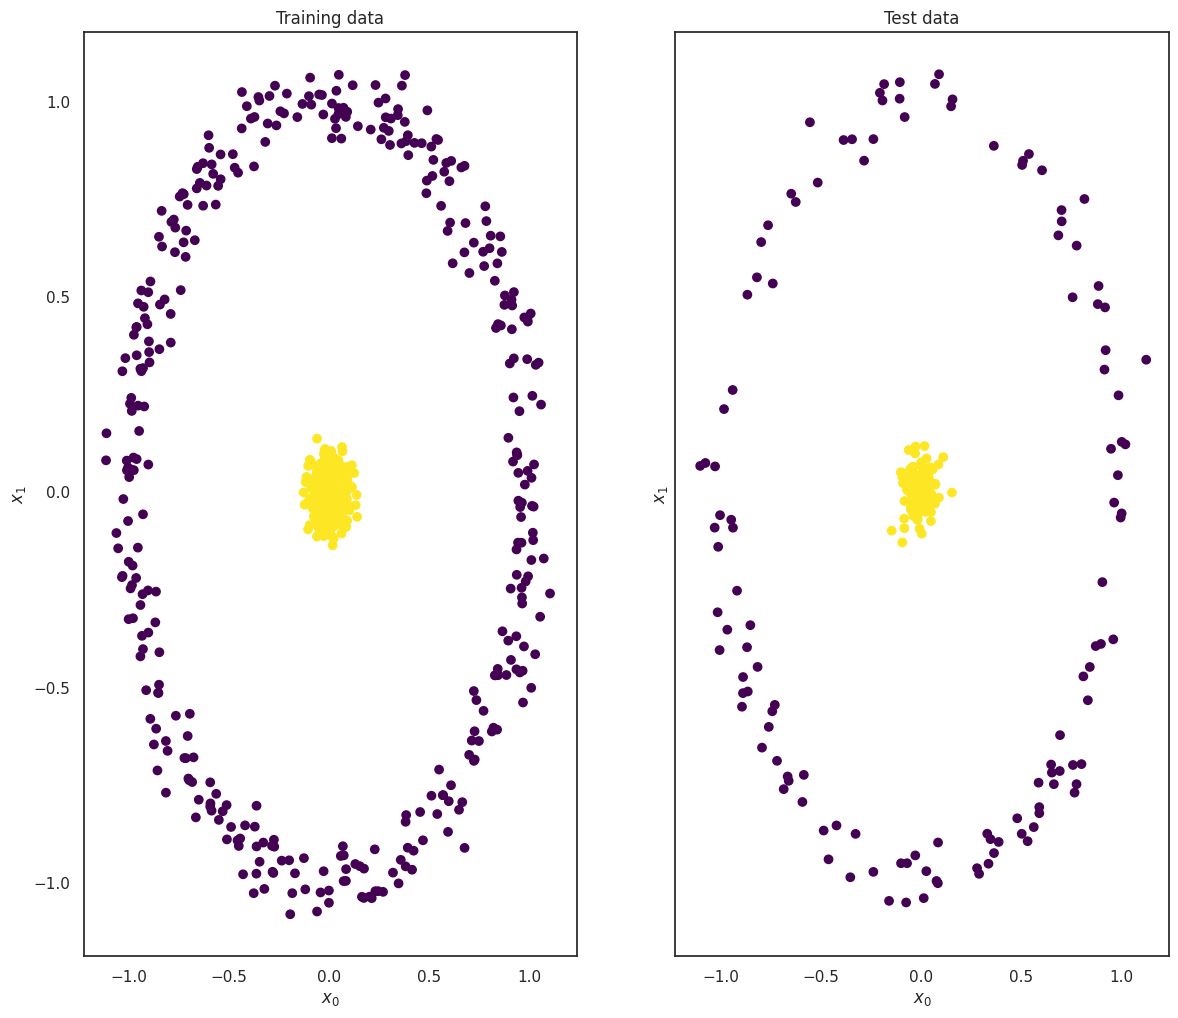

In [8]:
# Esta línea crea una figura de matplotlib con dos subgráficos en una fila. Los argumentos ncols = 2 indican que se desean dos columnas de subgráficos. Los argumentos sharex = True y sharey = True indican que los subgráficos comparten los mismos ejes x e y, lo que significa que los límites de los ejes x e y serán iguales para ambos subgráficos. El argumento figsize=(8, 4) establece el tamaño de la figura en pulgadas (ancho x alto). El _ se utiliza para descartar el primer objeto devuelto por plt.subplots(), ya que no se necesita en este caso. train_ax y test_ax son las variables que contienen las referencias a los subgráficos de entrenamiento y prueba, respectivamente.
fig, (train_ax, test_ax) = plt.subplots(ncols = 2, sharex = True, sharey = True, figsize = (14, 12))


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Estas líneas trazan un diagrama de dispersión utilizando el subgráfico train_ax. Las coordenadas x se toman de la columna 0 de X_train y las coordenadas y se toman de la columna 1 de X_train. El color de los puntos se establece según y_train utilizando el mapa de colores 'viridis'.
x = X_train[:, 0]
y = X_train[:, 1]
train_ax.scatter(x, y, c = y_train, cmap = 'viridis')

# Estas líneas establecen las etiquetas de los ejes x e y del subgráfico train_ax utilizando la notación de fórmula matemática con $ para subíndices. $x_{0}$ representa la etiqueta para la coordenada x en la posición 0 y $x_{1}$ representa la etiqueta para la coordenada y en la posición 1. También se establece el título del subgráfico como "Training data".
train_ax.set_xlabel("$x_{0}$")
train_ax.set_ylabel("$x_{1}$")
train_ax.set_title("Training data")


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Estas líneas trazan un diagrama de dispersión utilizando el subgráfico test_ax. Las coordenadas x se toman de la columna 0 de X_test y las coordenadas y se toman de la columna 1 de X_test. El color de los puntos se establece según y_test utilizando el mapa de colores 'viridis'.
x = X_test[:, 0]
y = X_test[:, 1]
test_ax.scatter(x, y, c = y_test, cmap = 'viridis')

# Estas líneas establecen las etiquetas de los ejes x e y del subgráfico test_ax utilizando la notación de fórmula matemática con $ para subíndices. También se establece el título del subgráfico como "Test data".
test_ax.set_xlabel("$x_{0}$")
test_ax.set_ylabel("$x_{1}$")
test_ax.set_title("Test data")


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# mostramos la imagen construida en pantalla
plt.show()

$ \ $

----

## ***Apply PCA***

$ \ $

There are several issues with the dataset above, the first being samples from each class cannot be linearly separated.

$ \ $

$(1)$ Let's see what happens when we perform PCA and evaluate the projection or score.

In [9]:
# Esta línea crea una instancia del objeto PCA (Análisis de Componentes Principales) con n_components=2, lo que indica que se desea reducir la dimensionalidad de los datos a 2 componentes principales.
pca = PCA(n_components = 2)

# Esta línea ajusta el modelo de PCA a los datos de entrenamiento X_train. El modelo aprende las transformaciones necesarias para reducir la dimensionalidad de los datos utilizando el método de PCA.
pca.fit(X_train)

# Esta línea aplica la transformación aprendida por el modelo de PCA a los datos de prueba X_test. La función transform proyecta los datos de prueba en el espacio de las componentes principales, lo que reduce su dimensionalidad a 2.
score_pca = pca.transform(X_test)

# Esta línea simplemente imprime el objeto PCA. Dependiendo de cómo se esté ejecutando el código, es posible que la salida muestre información sobre el modelo de PCA y sus parámetros.
pca

PCA(n_components=2)

$ \ $

$(2)$ We plot the $2$ principal components.

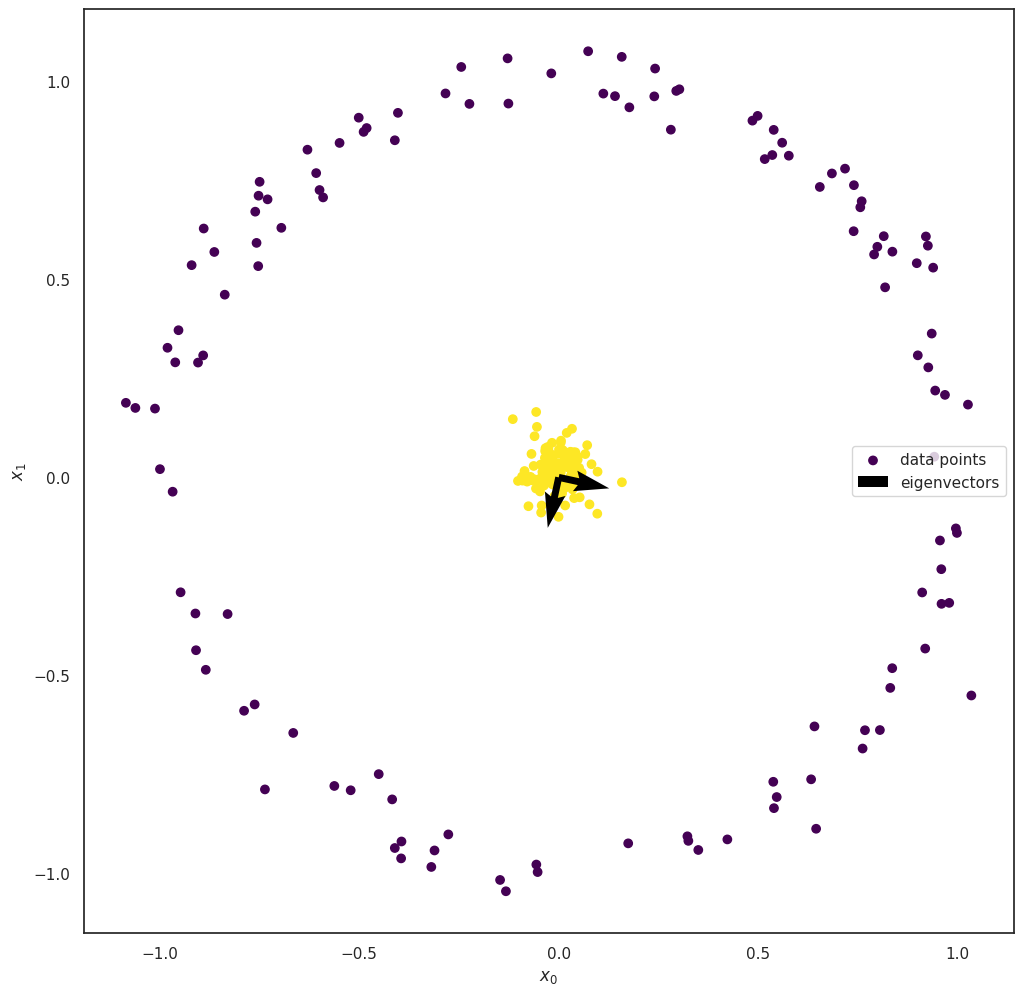

In [10]:
# Establecemos el tamaño del plot
plt.figure(figsize = (12, 12))

# Estas líneas asignan las coordenadas x e y de score_pca a las variables x e y, respectivamente. Luego, se traza un diagrama de dispersión utilizando la función scatter de matplotlib. Los valores de x y y representan las coordenadas de los puntos en el gráfico. El color de los puntos se establece según y_test utilizando el mapa de colores 'viridis'.
x = score_pca[:, 0]
y = score_pca[:, 1]
plt.scatter(x, y, c = y_test, label = "data points", cmap = 'viridis')

# Esta línea traza los vectores propios (eigenvectors) del modelo de PCA utilizando la función quiver de matplotlib. Los valores [0, 0] representan las coordenadas x e y del origen del vector. Los componentes del primer vector propio se toman de pca.components_[0, :] y los componentes del segundo vector propio se toman de pca.components_[1, :].
plt.quiver([0,0],[0,0], pca.components_[0,:], pca.components_[1,:], label = "eigenvectors")

# Estas líneas establecen las etiquetas de los ejes x e y del gráfico utilizando la notación de fórmula matemática con $ para subíndices. $x_{0}$ representa la etiqueta para la coordenada x en la posición 0 y $x_{1}$ representa la etiqueta para la coordenada y en la posición 1.
plt.xlabel("$x_{0}$")
plt.ylabel("$x_{1}$")

# Esta línea muestra la leyenda en el gráfico. El argumento loc='center right' indica que la leyenda se colocará en la esquina superior derecha del gráfico.
plt.legend(loc = 'center right')

# Esta línea muestra el gráfico en la pantalla.
plt.show()

$ \ $

$(3)$ The following red lines show the direction of projection onto the first principal component (the black dotted line) for each data point.

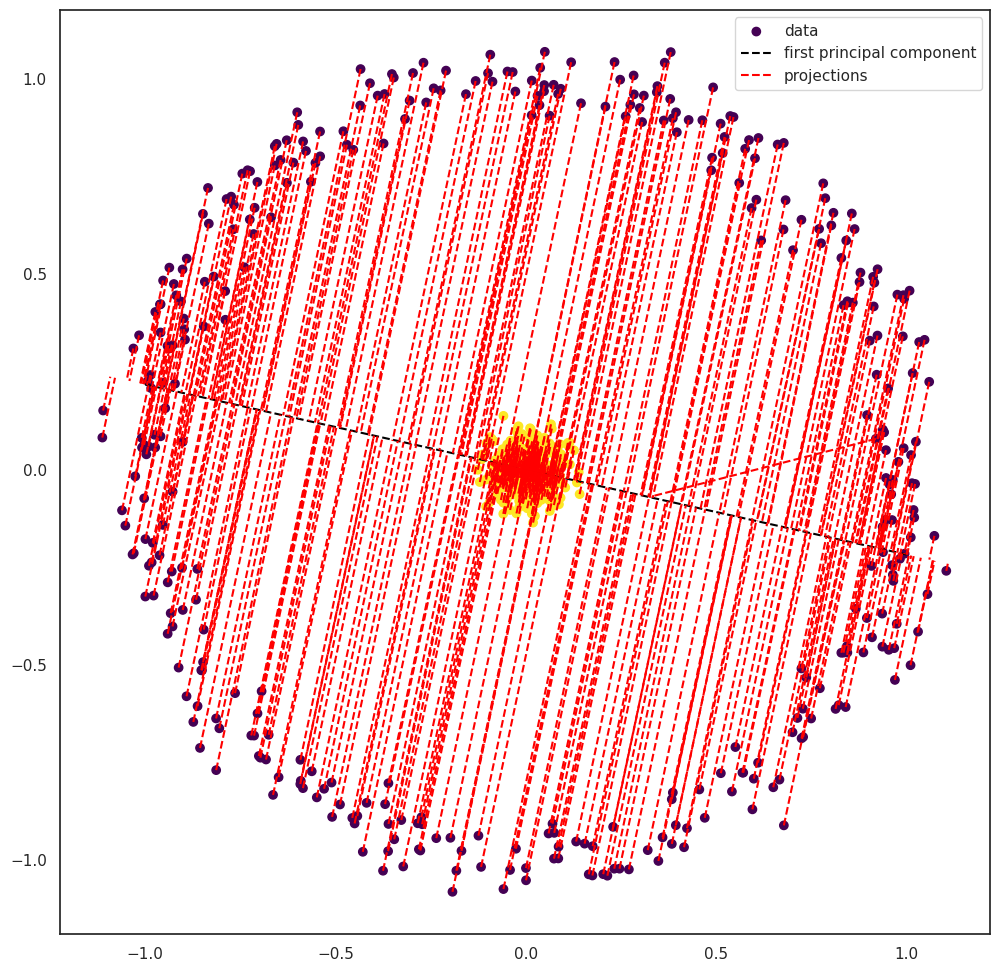

In [11]:
# Establecemos el tamaño del plot
plt.figure(figsize = (12, 12))

# La función plot_proj toma estos argumentos y realiza las siguientes acciones:
# Crea un gráfico de dispersión de los datos X_train con las etiquetas y_train.
# Traza una línea que representa el primer componente principal utilizando el vector de dirección pca.components_[0,:].
# Calcula y traza las proyecciones (líneas punteadas rojas) de cada punto de datos en la dirección del primer componente principal.
# Muestra la leyenda en el gráfico.
plot_proj(X_train, pca.components_[0, :], y_train, "first principal component")

$ \ $

$(4)$ We plot out the actual points of projection onto the first principal component, which are also known as their scores for the PC. We see that the dataset is not linearly separable, as data points from different classes cannot be separated with a plane.

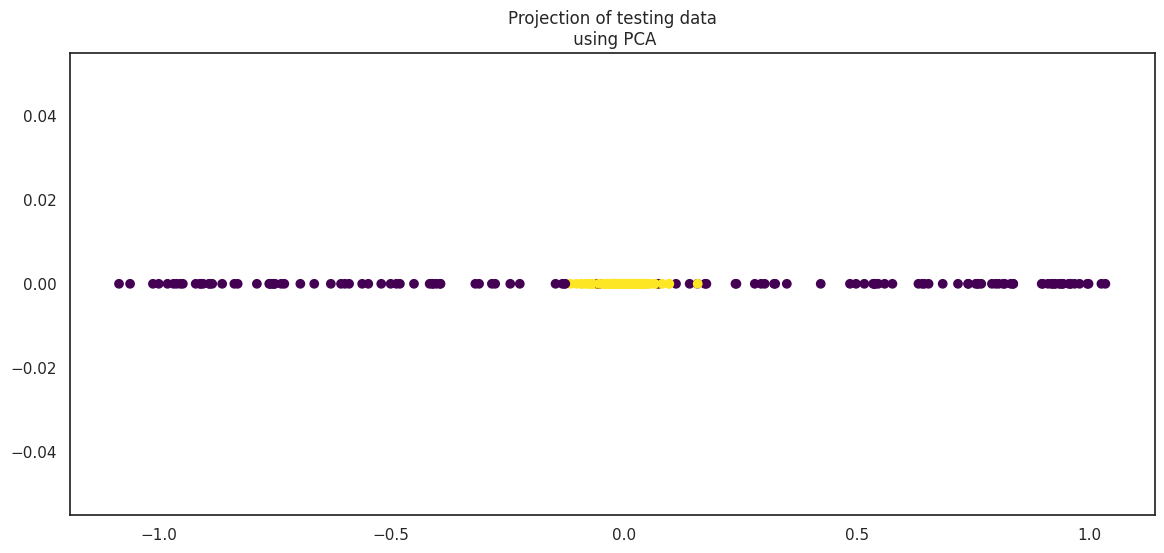

In [12]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# Esta línea traza un diagrama de dispersión utilizando la función scatter de matplotlib. Los valores score_pca[:, 0] se utilizan como coordenadas x de los puntos en el gráfico. np.zeros(score_pca[:, 0].shape[0]) se utiliza como coordenadas y, creando una línea horizontal en el eje y en la posición 0. Los colores de los puntos se establecen según y_test utilizando el mapa de colores 'viridis'.
x = score_pca[:,0]
y = np.zeros(score_pca[:,0].shape[0])
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# Esta línea establece el título del gráfico como "Projection of testing data using PCA". El \n en el título crea una nueva línea para mostrar el texto en dos líneas.
plt.title("Projection of testing data\n using PCA")

# Esta línea muestra el gráfico en la pantalla.
plt.show()

$ \ $

$(5)$ If we plot the projection onto both principal components, we see the data looks the same, or isotropic, meaning that it has the same value when measured in a different coordinate system. This is because the data is symmetric and the variance is equal on each side. As a result, PCA will not help us classify the data.

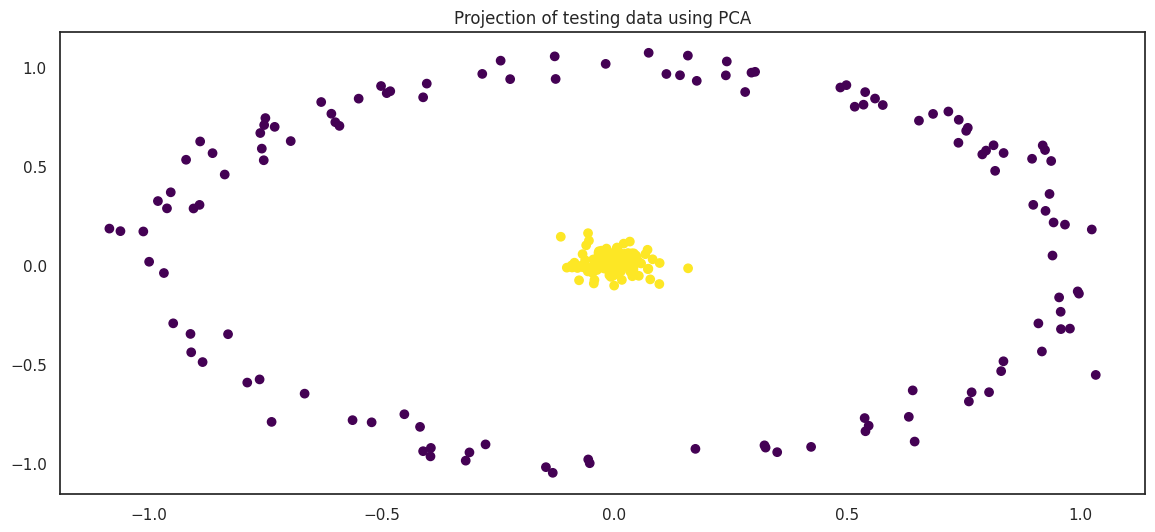

In [13]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# Estas líneas asignan las coordenadas x e y de score_pca a las variables x e y, respectivamente. Luego, se traza un diagrama de dispersión utilizando la función scatter de matplotlib. Los valores de x y y representan las coordenadas de los puntos en el gráfico. El color de los puntos se establece según y_test utilizando el mapa de colores 'viridis'.
x = score_pca[:, 0]
y = score_pca[:, 1]
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# Esta línea establece el título del gráfico como "Projection of testing data using PCA".
plt.title("Projection of testing data using PCA")

# mostramos la imagen creada en pantalla
plt.show()

$ \ $

$(6)$ Building a Logistic Regression model on the training set, we can see that the accuracy score is around $50 \%$, suggesting that the model is arbitrarily worse. Hence, we can see that it'd be unsuitable to project the data onto a low-dimensional linear subspace.


In [14]:
# Esta línea crea una instancia del objeto LogisticRegression, que representa un modelo de regresión logística.
lr = LogisticRegression()

# Esta línea ajusta el modelo de regresión logística utilizando los datos de entrenamiento X_train y las etiquetas de entrenamiento y_train. El modelo aprende a ajustar los datos y encontrar los coeficientes óptimos para la regresión logística.
lr.fit(X_train, y_train)

# Esta línea calcula la precisión media del modelo en el conjunto de prueba utilizando la función score. El método score devuelve la precisión media del modelo en los datos de prueba, que es la proporción de predicciones correctas en relación con las etiquetas reales.
score = lr.score(X_test, y_test)

# Esta línea imprime el valor de la precisión media del modelo en el conjunto de prueba utilizando la función score. El método score devuelve la precisión media del modelo en los datos de prueba, que es la proporción de predicciones correctas en relación con las etiquetas reales.
print(f"Test set  mean accuracy score for PCA: {score}")

Test set  mean accuracy score for PCA: 0.496


$ \ $

-----

## ***Transform a Dataset to a Higher Dimension and then Apply PCA***

$ \ $


$(1)$ Let's apply the following polynomial transformation to the data.

$$\mathbf{\phi}(x_{1}, x_{2})=(x_{1}, x_{2}, x_{1}^2+x_{2}^2)$$

In [15]:
# Este fragmento de codigo utiliza la función np.concatenate para concatenar las matrices x y y a lo largo de la dimensión de las columnas utilizando axis=1.
x = X_train
y = (X_train**2).sum(axis = 1).reshape(-1,1)
PHI_train = np.concatenate((x, y), axis = 1)

In [16]:
# Este fragmento de codigo utiliza la función np.concatenate para concatenar las matrices x e y a lo largo de la dimensión de las columnas utilizando axis=1.
x = X_test
y = (X_test**2).sum(axis = 1).reshape(-1,1)
PHI_test = np.concatenate((x, y), axis = 1)

$ \ $

$(2)$ We can plot the result  where  on the horizontal axis we have $x_{1}$ and $x_{2}$, and on the vertical axis we have $x_{1}^2+x_{2}^2$. We see that the larger ring has been mapped upwards in the vertical direction as the sum of its squared components is larger.


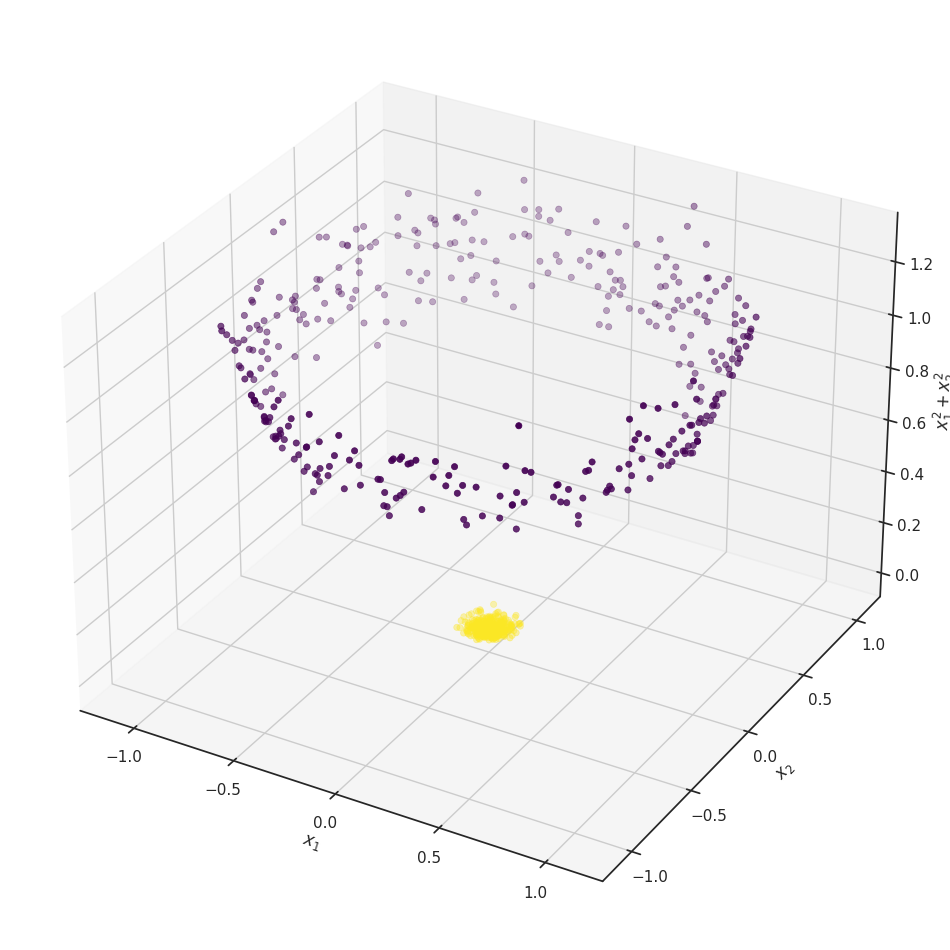

In [17]:
# Esta línea crea una nueva figura.
fig = plt.figure(figsize = (12, 14))

# Esta línea agrega un subplot tridimensional a la figura utilizando la proyección '3d'.
ax = fig.add_subplot(projection = '3d')

# Estas líneas asignan las columnas correspondientes de PHI_train a las variables x, y y z, respectivamente. Estas variables representan las coordenadas x, y, z en el gráfico 3D.
x = PHI_train[:,0]
y = PHI_train[:,1]
z = PHI_train[:,2]

# Esta línea traza un diagrama de dispersión tridimensional utilizando la función scatter de matplotlib. El color de los puntos se establece según y_train utilizando el mapa de colores 'viridis', y el parámetro linewidth controla el ancho de los bordes de los puntos.
ax.scatter(x, y, z, c = y_train, cmap = 'viridis', linewidth = 0.5)

# Estas líneas establecen las etiquetas de los ejes x, y, z en el gráfico 3D.
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$x_{1}^2+x_{2}^2$')

# Esta línea muestra el gráfico 3D en la pantalla.
plt.show()

$ \ $

$(3)$ We perform $PCA$ on this transformed data, specifying we want to keep the top three principal components.

In [18]:
# En esta línea, crea una instancia de la clase PCA del módulo sklearn.decomposition. El parámetro n_components se establece en 3, lo que significa que queremos obtener tres componentes principales de los datos. PCA es una técnica de reducción de dimensionalidad que nos permite representar los datos en un espacio de menor dimensión.
pca = PCA(n_components = 3)

# En esta línea, se ajusta el modelo de PCA utilizando los datos de entrenamiento PHI_train. El método fit calcula los componentes principales basados en los datos de entrenamiento proporcionados. Después de esta línea, el modelo de PCA está ajustado y listo para ser utilizado para transformar otros conjuntos de datos.
pca.fit(PHI_train)

# En esta línea, se utiliza el modelo de PCA ajustado para transformar los datos de prueba PHI_test. El método transform proyecta los datos de prueba en el espacio de las componentes principales obtenidas a partir de los datos de entrenamiento.
score_polly = pca.transform(PHI_test)

$ \ $

$(4)$ We plot out the data points projection onto the first PC/scores. Below, we see that the dataset is almost linearly separable.

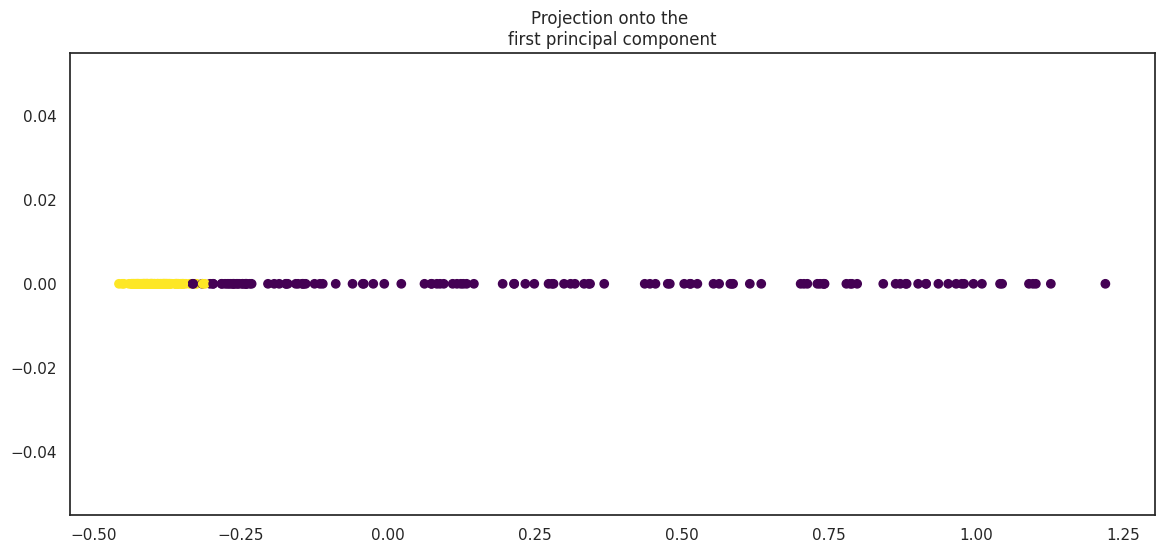

In [19]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En esta línea, se calcula el número de filas en el array score_polly. El atributo shape devuelve las dimensiones del array, y [0] se utiliza para obtener el tamaño en la dimensión de las filas. Esto se guarda en la variable number_lines, que representa el número de líneas o puntos en el gráfico de dispersión.
number_lines = score_polly.shape[0]

# En esta línea, se crea una variable x que contiene la primera columna del array score_polly. Esto corresponde a los valores de la primera componente principal para cada punto en el gráfico.
x = score_polly[:, 0]

# En esta línea, se crea un array de ceros de longitud number_lines y se guarda en la variable y. Esto se hace para crear un conjunto de valores y que será utilizado como coordenada y en el gráfico de dispersión. Los valores de y serán todos cero, lo que significa que los puntos se mostrarán en una línea horizontal.
y = np.zeros(number_lines)

# En esta línea, se utiliza la función scatter de matplotlib.pyplot para crear un gráfico de dispersión. Se pasan los arrays x e y como coordenadas x e y de los puntos. El argumento c se establece en y_test, lo que indica que se utilizará y_test para asignar colores a los puntos en el gráfico. El argumento cmap se establece en 'viridis', que es un mapa de colores para representar la variable y_test de manera visualmente atractiva.
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# En esta línea, se establece el título del gráfico utilizando la función title de matplotlib.pyplot. El título se establece en "Proyección sobre la primera componente principal".
plt.title("Projection onto the \nfirst principal component")

# En esta línea, se muestra el gráfico utilizando la función show de matplotlib.pyplot. Esto abrirá una ventana o mostrará el gráfico en el entorno en el que se esté ejecutando el código.
plt.show()

$ \ $

$(5)$ Projecting onto a plane formed by the top two principal components (the ones with the largest absolute eigenvalues), we see the dataset is linearly separable with the exception of a couple of points.

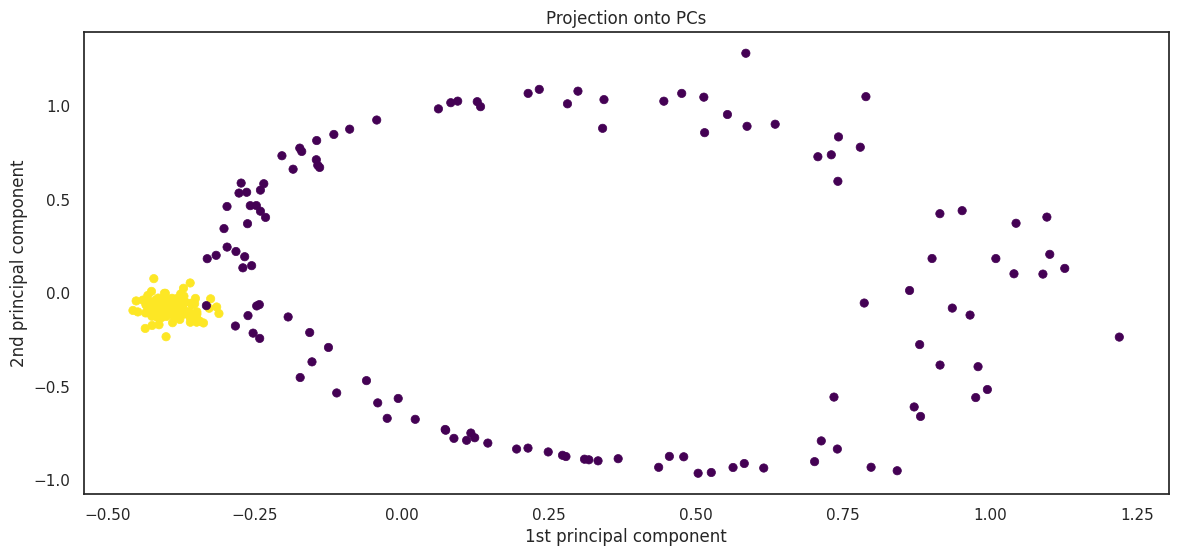

In [20]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En estas líneas, se crean las variables x y y que contienen las proyecciones de los datos en la primera y segunda componente principal, respectivamente.
x = score_polly[:, 0]
y = score_polly[:, 1]

# En esta linea se utiliza la función scatter de matplotlib.pyplot para crear un gráfico de dispersión. Se pasan los arrays x e y como las coordenadas x e y de los puntos. El argumento c se establece en y_test, lo que indica que se utilizará y_test para asignar colores a los puntos en el gráfico. El argumento cmap se establece en 'viridis', que es un mapa de colores para representar la variable y_test de manera visualmente atractiva. El argumento linewidth se establece en 0.5 para ajustar el grosor de los bordes de los puntos en el gráfico.
plt.scatter(x, y, c = y_test, cmap = 'viridis', linewidth = 0.5)

# En estas líneas, se establecen las etiquetas de los ejes x e y utilizando las funciones xlabel y ylabel de matplotlib.pyplot. Se establece el título del gráfico utilizando la función title. Estas líneas añaden los nombres de los componentes principales a los ejes x e y y establecen un título para el gráfico.
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")
plt.title("Projection onto PCs")

# mostramos la imagen construida en pantalla
plt.show()


$ \ $

$(6)$ By building a Logistic Regression model on the training set, we see the accuracy is much better.

In [21]:
# En esta línea, se crea una instancia de la clase LogisticRegression.
lr = LogisticRegression()

# En esta línea, se ajusta el modelo de regresión logística utilizando los datos de entrenamiento PHI_train y las etiquetas correspondientes y_train. El método fit ajusta el modelo a los datos, lo que significa que se encuentran los coeficientes óptimos para la regresión logística.
lr.fit(PHI_train, y_train)

# En esta línea, se evalúa el modelo ajustado en los datos de prueba PHI_test y las etiquetas correspondientes y_test. El método score calcula la precisión media del modelo en los datos de prueba, es decir, la proporción de predicciones correctas en relación con las etiquetas de prueba.
score = lr.score(PHI_test, y_test)

# En esta línea, se imprime en la consola el resultado de la evaluación del modelo en los datos de prueba. La puntuación de precisión media se muestra en formato de cadena junto con un mensaje descriptivo.
print(f"Test set  mean accuracy score for Kernal PCA: {score}")

Test set  mean accuracy score for for Kernal PCA: 1.0


$ \ $

------

## ***Kernel Gaussiano***

$ \ $

El $\color{lightblue}{\text{kernel de función de base radial}}$, también conocido como kernel gaussiano, es una función de kernel ampliamente utilizada en diferentes algoritmos de aprendizaje automático, como:

* Las Máquinas de Vectores de Soporte (SVM).

* El Análisis de Componentes Principales del Núcleo (Kernel PCA).


Esta función se define de la siguiente manera:

$$K(x, x') = e ^ {-\color{lightgreen}{\Gamma} \cdot ||x - x^{\prime}||^2}$$

En esta ecuación, $x$ y $x^{\prime}$ son dos puntos de datos en el espacio de características original, $||x - x^{\prime}||^{2}$ representa la distancia euclidiana al cuadrado entre los puntos, y $\color{lightgreen}{\Gamma}$ es un parámetro que controla la influencia de cada punto de datos.

El $\color{lightblue}{\text{kernel de función de base radial}}$ mide la similitud o cercanía entre dos puntos de datos en función de su distancia euclidiana en el espacio de características. Asigna un valor alto a los puntos que están cerca entre sí y un valor bajo a los puntos que están lejos. La salida de la función de kernel varía entre $0$ y $1$, donde $1$ representa máxima similitud y $0$ representa ninguna similitud.

El parámetro $\color{lightgreen}{\Gamma}$ en el kernel de función de base radial controla la forma de la función de kernel y determina la influencia de cada punto de datos. Un valor pequeño de $\color{lightgreen}{\Gamma}$ conduce a un kernel más suave y más disperso, lo que resulta en una noción más amplia de similitud entre puntos. Un valor grande de $\color{lightgreen}{\Gamma}$ resulta en un kernel más localizado con un pico más agudo, lo que indica una noción más estricta de similitud.

En el contexto de Kernel $PCA$ o $SVM$, el kernel de función de base radial permite transformaciones no lineales de los datos, mapeándolos eficazmente en un espacio de características de mayor dimensión. Captura relaciones complejas entre los puntos de datos, lo que permite descubrir patrones y estructuras no lineales.

Cuando se utiliza el kernel de función de base radial en Kernel $PCA$, permite identificar componentes principales no lineales que capturan las variaciones más significativas en los datos. Proporciona una herramienta flexible y poderosa para la reducción de dimensionalidad y la representación no lineal de datos.

Es importante tener en cuenta que la elección del parámetro $\color{lightgreen}{\Gamma}$ en el kernel de función de base radial es crucial y puede tener un impacto significativo en los resultados. A menudo, requiere ajuste a través de validación cruzada u otras técnicas de optimización para encontrar el valor óptimo para un dominio de problema específico.


$ \ $

------

## ***El cálculo del kernel***

$ \ $

El cálculo del kernel implica evaluar la matriz de Gram, que se construye a partir de $N$ muestras, así como sus autovectores y autovalores. Por lo tanto, si hay muchas muestras en tu conjunto de entrenamiento, es posible que encuentres problemas. Matemáticamente, el cálculo de la matriz de Gram se realiza de la siguiente manera:

Dado un conjunto de entrenamiento con $N$ muestras representadas por vectores de características $x_{i}$, donde $i = 1, 2, ..., N$ la matriz de Gram $K = (K_{ij})_{1\leq i,j\leq N}$ se calcula como:


$$K_{ij} = K(x_{i}, x_{j}) = e^{-\color{lightgreen}{\Gamma}\cdot ||x_i - x_j||^2}$$


En esta ecuación, $K_{ij}$ representa el elemento en la posición $(i, j)$ de la matriz de Gram. Se calcula evaluando la función de kernel $RBF$ (función de base radial) entre los vectores de características $x_i$ y $x_j$. Ademas, $||x_i - x_j||^2$ representa la distancia euclidiana al cuadrado entre los vectores. Una vez que se ha calculado la matriz de Gram $K$, el siguiente paso es obtener los autovectores y autovalores de $K$. Esto implica resolver la siguiente ecuación:


$$K \cdot x = \color{lightblue}{λ} \cdot x$$


Donde $K$ es la matriz de Gram, a es un autovector y $λ$ es el autovalor correspondiente. La solución de esta ecuación proporciona los autovectores y autovalores de $K$. En la práctica, el cálculo y almacenamiento de la matriz de Gram puede ser computacionalmente costoso cuando el número de muestras $N$ es grande. Esto se debe a que la matriz de Gram tiene una dimensión $N \times N$, lo que requiere un gran espacio de memoria y puede llevar mucho tiempo calcularla. Para abordar este problema, existen técnicas de aproximación y métodos eficientes de cálculo que pueden reducir la carga computacional. Algunas de estas técnicas incluyen el uso de métodos de muestreo aleatorio, aproximación mediante árboles, o la utilización de trucos de cálculo del kernel.

En resumen, el cálculo del kernel implica evaluar la matriz de Gram, que se construye a partir de las muestras del conjunto de entrenamiento. Si hay muchas muestras en el conjunto de entrenamiento, puede haber problemas en términos de consumo de memoria y tiempo de cálculo. Para superar estos problemas, se pueden utilizar técnicas de aproximación y métodos eficientes de cálculo para reducir la carga computacional asociada con el cálculo del kernel.

$ \ $

----

## ***Applying Kernel PCA***

$ \ $

$(1)$ We create a Kernel Principal Component Analysis (KPCA) object.

In [22]:
# Crea una instancia de la clase KernelPCA del módulo sklearn.decomposition. Esta clase implementa el algoritmo de Análisis de Componentes Principales del Núcleo (Kernel PCA) utilizando un kernel de función de base radial (RBF).
# kernel = "rbf": Este parámetro especifica que se utilizará el kernel de función de base radial (RBF) para realizar la transformación no lineal en el espacio de características. El kernel RBF es un tipo de kernel ampliamente utilizado que puede capturar relaciones no lineales entre los datos.
# gamma = 10: El parámetro gamma controla la influencia del kernel RBF. Un valor mayor de gamma genera una función de kernel más localizada y con un pico más afilado, lo que indica una noción más estricta de similitud entre los datos.
# fit_inverse_transform = True: Este parámetro indica que se ajustará una transformación inversa durante el ajuste del modelo. Esto permitirá obtener una aproximación de los datos originales en el espacio de características original a partir de los componentes principales calculados en el espacio de características de mayor dimensión.
# alpha = 0.1: El parámetro alpha controla el peso de la regularización en el algoritmo de Kernel PCA. Un valor mayor de alpha impone una mayor regularización, lo que puede ayudar a evitar el sobreajuste y mejorar la generalización del modelo.
kernel_pca = KernelPCA(kernel = "rbf", gamma = 10, fit_inverse_transform = True, alpha = 0.1)


$ \ $

$(2)$ We can now fit the model.

In [23]:
# En esta línea de código, se ajusta el modelo de Kernel PCA utilizando los datos de entrenamiento X_train. El método fit se utiliza para ajustar el modelo a los datos proporcionados.
# Después de ajustar el modelo, se obtendrán los componentes principales calculados en el espacio de características de mayor dimensión, utilizando el kernel especificado anteriormente. Estos componentes principales capturan las variaciones más significativas en los datos y se utilizan para transformar los datos en el nuevo espacio de características.
kernel_pca.fit(X_train)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=10, kernel='rbf')

$ \ $

$(3)$ We transform the data, which helps us to find the projection of the fitted data on the kernel principal components.


In [24]:
# En esta línea de código, se utiliza el modelo de Kernel PCA previamente ajustado para transformar los datos de prueba X_test al espacio de características de mayor dimensión. El método transform se aplica al objeto kernel_pca y se pasan los datos de prueba como argumento.
score_kernel_pca = kernel_pca.transform(X_test)

$ \ $

$(4)$ To better see how much variance is explained by each principal component, we take a look at the magnitude of their respective eigenvalues. Below, you can see that the first few principal components have the largest absolute eigenvalue, and the values continues to decrease after that.

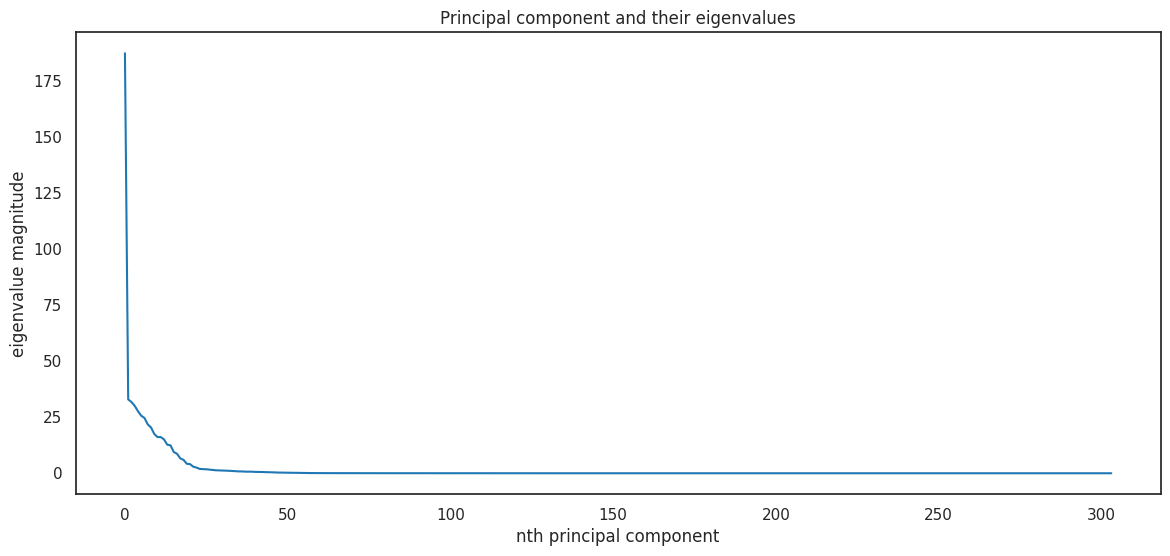

In [25]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En esta línea, se utiliza la función plot de matplotlib.pyplot para trazar los eigenvalores del modelo de Kernel PCA. Los eigenvalores representan la magnitud de la varianza explicada por cada componente principal. Al llamar a kernel_pca.eigenvalues_, se accede a los eigenvalores calculados durante el ajuste del modelo de Kernel PCA.
plt.plot(kernel_pca.eigenvalues_)

# En esta línea, se establece el título del gráfico utilizando la función title de matplotlib.pyplot. El título se establece en "Principal component and their eigenvalues", que describe que el gráfico mostrará los componentes principales y sus eigenvalores asociados.
plt.title("Principal component and their eigenvalues")

# En esta línea, se establece la etiqueta del eje x utilizando la función xlabel de matplotlib.pyplot. La etiqueta se establece en "nth principal component", que indica que el eje x del gráfico representará los componentes principales.
plt.xlabel("nth principal component")

# En esta línea, se establece la etiqueta del eje y utilizando la función ylabel de matplotlib.pyplot. La etiqueta se establece en "eigenvalue magnitude", que indica que el eje y del gráfico representará la magnitud de los eigenvalores.
plt.ylabel("eigenvalue magnitude")

# En esta línea, se muestra el gráfico utilizando la función show de matplotlib.pyplot. Esto abrirá una ventana o mostrará el gráfico en el entorno en el que se esté ejecutando el código
plt.show()

$ \ $

$(5)$ Again, by plotting the data points projection onto the first two principal components, we can see that the data is linearly separable, demonstrating that kernel $PCA$ performs better than our polynomial approximation.

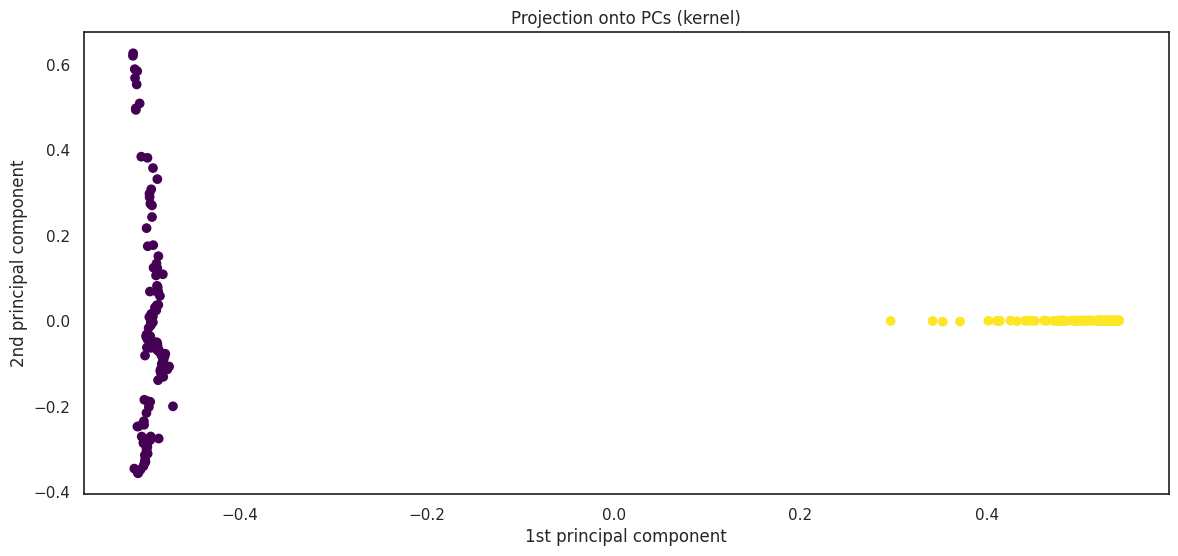

In [26]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En estas líneas, se crean las variables x e y que contienen las proyecciones de los datos en el primer y segundo componente principal obtenidos a través del Kernel PCA. Luego, se utiliza la función scatter de matplotlib.pyplot para crear un gráfico de dispersión. Se pasan los arrays x e y como las coordenadas x e y de los puntos. El argumento c se establece en y_test, lo que indica que se utilizará y_test para asignar colores a los puntos en el gráfico. El argumento cmap se establece en 'viridis', que es un mapa de colores para representar la variable y_test de manera visualmente atractiva.
x = score_kernel_pca[:, 0]
y = score_kernel_pca[:, 1]
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# En esta línea, se establece el título del gráfico utilizando la función title de matplotlib.pyplot. El título se establece en "Projection onto PCs (kernel)", que describe que el gráfico muestra la proyección de los datos en los componentes principales obtenidos a través del Kernel PCA.
plt.title("Projection onto PCs (kernel)")

# En estas líneas, se establecen las etiquetas de los ejes x e y utilizando las funciones xlabel y ylabel de matplotlib.pyplot. Los ejes x e y se etiquetan como "1st principal component" y "2nd principal component", respectivamente, indicando que representan el primer y segundo componente principal.
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

# Esta línea muestra el gráfico utilizando la función show de matplotlib.pyplot. Esto abrirá una ventana o mostrará el gráfico en el entorno en el que se esté ejecutando el código.
plt.show()

In PCA, the reconstruction was exactly the same as the original component, if `n_components` is equal to the dimension of the original features. On the other hand, Kernel $PCA$ does not actually span $\phi(x)$ but instead spans a subspace. Therefore, the inverse transformation will not always reconstruct the data, like in $PCA$.


$ \ $

$(6)$ We verify this by comparing the inverse transformation of Kernel $PCA$ and $PCA$.


In [27]:
# En esta línea, se crea una instancia de la clase PCA del módulo sklearn.decomposition. Esta clase implementa el Análisis de Componentes Principales (PCA) tradicional, que es una técnica de reducción de dimensionalidad lineal.
pca = PCA(n_components = 2)

# En esta línea, se ajusta el modelo de PCA utilizando los datos de entrenamiento X_train. El método fit se utiliza para ajustar el modelo a los datos proporcionados.
pca.fit(X_train)

PCA(n_components=2)

In [28]:
# En esta línea, se utiliza el modelo de PCA ajustado para transformar los datos de prueba X_test al espacio de características de menor dimensión utilizando el método transform.
trans = pca.transform(X_test)

# En esta linea se utiliza el método inverse_transform para revertir la transformación y obtener las reconstrucciones de los datos en el espacio de características original. Estas reconstrucciones se asignan a la variable X_hat_pca.
X_hat_pca = pca.inverse_transform(trans)

In [29]:
# En esta línea, se utiliza el modelo de Kernel PCA previamente ajustado para transformar los datos de prueba X_test al espacio de características de mayor dimensión utilizando el método transform.
trans = kernel_pca.transform(X_test)

# En esta linea se utiliza el método inverse_transform para revertir la transformación y obtener las reconstrucciones de los datos en el espacio de características original. Estas reconstrucciones se asignan a la variable X_hat_kpca.
X_hat_kpca = kernel_pca.inverse_transform(trans)

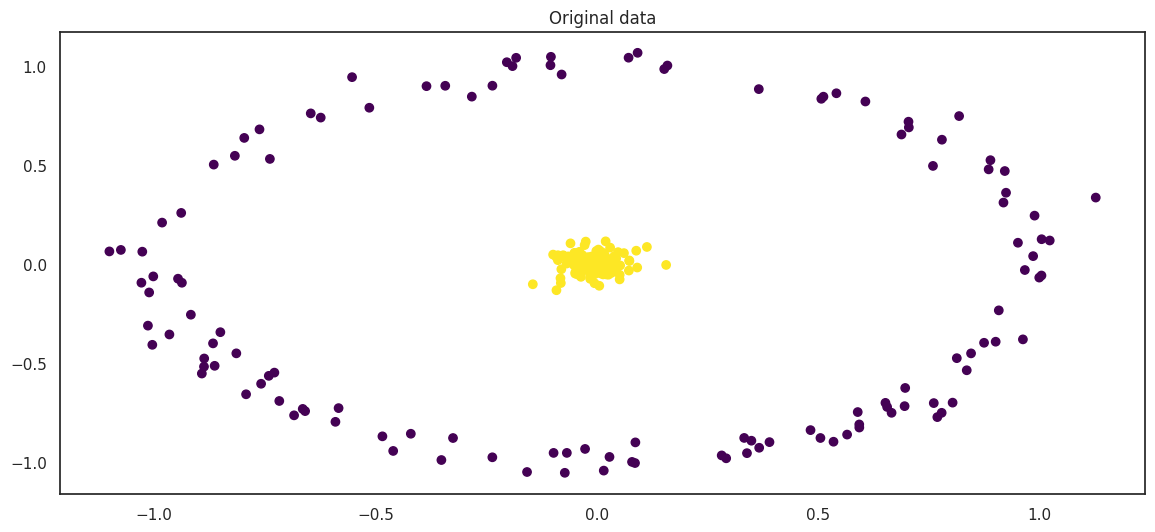

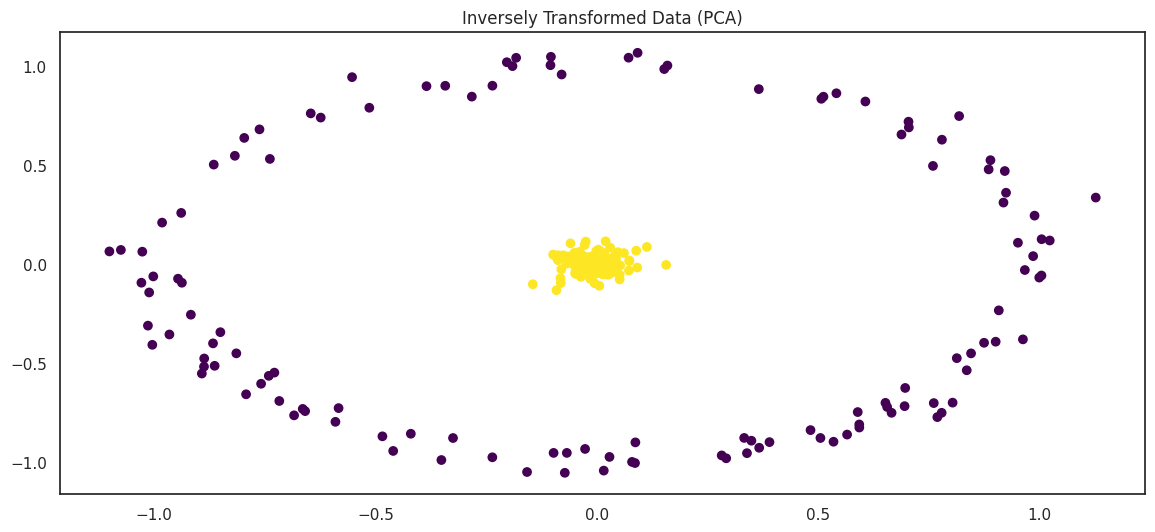

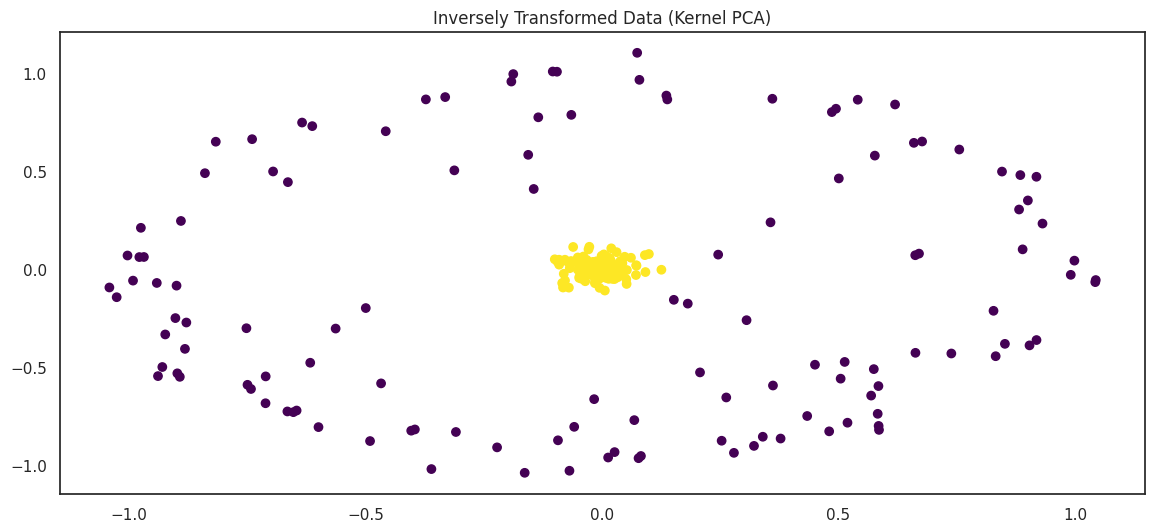

In [30]:
# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En estas líneas, se extraen las coordenadas x e y de los datos de prueba originales (X_test) y se utilizan para crear un gráfico de dispersión utilizando la función scatter de matplotlib.pyplot. Los puntos se representan como puntos individuales y se les asigna colores basados en los valores de y_test. El argumento cmap se establece en 'viridis', que es un mapa de colores para representar la variable y_test de manera visualmente atractiva.
x = X_test[:, 0]
y = X_test[:, 1]
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# En esta línea, se establece el título del gráfico utilizando la función title de matplotlib.pyplot. El título se establece en "Original data", indicando que el gráfico muestra los datos originales sin ninguna transformación.
plt.title("Original data")

# Esta línea muestra el gráfico utilizando la función show de matplotlib.pyplot. Esto abrirá una ventana o mostrará el gráfico en el entorno en el que se esté ejecutando el código.
plt.show()

# Creamos un espacio entre cada plot
print("\n\n\n")


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En estas líneas, se extraen las coordenadas x e y de los datos transformados inversamente utilizando PCA tradicional (X_hat_pca). Se crea un gráfico de dispersión utilizando la función scatter de matplotlib.pyplot, y los puntos se asignan colores basados en los valores de y_test.
x = X_hat_pca[:, 0]
y = X_hat_pca[:, 1]
plt.scatter(x, y, c = y_test ,cmap = 'viridis')

# En esta línea, se establece el título del gráfico como "Inversely Transformed Data (PCA)", que describe que el gráfico muestra los datos transformados inversamente utilizando PCA tradicional.
plt.title("Inversely Transformed Data (PCA)")

# Esta línea muestra el gráfico utilizando la función show de matplotlib.pyplot.
plt.show()

# Creamos un espacio entre cada plot
print("\n\n\n")


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Establecemos el tamaño del plot
plt.figure(figsize = (14, 6))

# En estas líneas, se extraen las coordenadas x e y de los datos transformados inversamente utilizando Kernel PCA (X_hat_kpca). Se crea un gráfico de dispersión utilizando la función scatter de matplotlib.pyplot, y los puntos se asignan colores basados en los valores de y_test.
x = X_hat_kpca[:, 0]
y = X_hat_kpca[:, 1]
plt.scatter(x, y, c = y_test, cmap = 'viridis')

# En esta línea, se establece el título del gráfico como "Inversely Transformed Data (Kernel PCA)", que describe que el gráfico muestra los datos transformados inversamente utilizando Kernel PCA.
plt.title("Inversely Transformed Data (Kernel PCA)")

# Esta línea muestra el gráfico utilizando la función show de matplotlib.pyplot.
plt.show()

$ \ $

$(7)$ We can also calculate the error in the mean squared error for the inverse transformation, which is larger for Kernel $PCA$ than for $PCA$, whose $MSE$ is approximately $0$, since the transformed data for it is identical to the original.

In [31]:
# En esta línea, se realiza el cálculo del error cuadrático medio. Primero, se resta X_hat_kpca de X_test para obtener la diferencia entre los datos originales y las reconstrucciones de Kernel PCA. Luego, se eleva al cuadrado cada elemento de esta diferencia utilizando el operador **2. Después, se calcula la media de todos los elementos utilizando el método mean().
error = ((X_test-X_hat_kpca)**2).mean()

# En esta línea, se imprime en pantalla el valor del error cuadrático medio calculado para Kernel PCA utilizando la función print(). Se muestra el mensaje "Mean squared error for Kernel PCA is:" seguido del valor del error almacenado en la variable error.
print("Mean squared error for Kernel PCA is:", error)

Mean squared error for Kernel PCA is: 0.011275231727641355


In [32]:
# En esta línea, se realiza el cálculo del error cuadrático medio. Primero, se resta X_hat_pca de X_test para obtener la diferencia entre los datos originales y las reconstrucciones de PCA. Luego, se eleva al cuadrado cada elemento de esta diferencia utilizando el operador **2. Después, se calcula la media de todos los elementos utilizando el método mean().
error = ((X_test-X_hat_pca)**2).mean()

# En esta línea, se imprime en pantalla el valor del error cuadrático medio calculado para PCA utilizando la función print(). Se muestra el mensaje "Mean squared error PCA is:" seguido del valor del error almacenado en la variable error.
print("Mean squared error PCA is:" , error)

Mean squared error PCA is: 1.4617528040045885e-33


$ \ $

-----

## ***Using Kernel PCA to Predict if You're the Richest Person in the World***

$ \ $



"The World's Billionaires" is an extensive ranking that provides insights into the net worth and fortunes of the richest individuals worldwide. It serves as a comprehensive resource for tracking the wealth of billionaires across various industries and countries.

The ranking is compiled and published annually by Forbes, a prominent American business magazine known for its coverage of finance, business, and entrepreneurship. Forbes uses a combination of publicly available information, such as stock prices, real estate valuations, and company financials, along with proprietary research and interviews to estimate the net worth of each billionaire.

The dataset used in this lab is sourced from Forbes, offering a snapshot of the net worth of the world's billionaires. It provides valuable information for analysis and visualization, allowing researchers and enthusiasts to gain insights into the distribution of wealth, trends among billionaires, and changes in rankings over time.

By applying Kernel PCA (Principal Component Analysis) to this dataset, the goal is to uncover underlying patterns and relationships among the richest individuals. Kernel PCA is a dimensionality reduction technique that allows for non-linear mappings, enabling a better understanding of complex datasets.


$ \ $

-----

## ***Data Analysis***

$ \ $

$(1)$ We load the dataset and take a look to see if it loaded properly.

In [66]:
# Esta línea de código asigna la URL del conjunto de datos,
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/billionaires.csv'

# Esta línea lee el archivo CSV ubicado en la URL proporcionada y lo asigna al DataFrame 'df'. Se utiliza la función 'read_csv' de la biblioteca pandas para leer el archivo CSV, y se establece el parámetro 'index_col' en "Unnamed: 0" para especificar que la primera columna del archivo CSV debe utilizarse como índice del DataFrame.
df = pd.read_csv(url, index_col = "Unnamed: 0")

# mostramos las 5 primeras lineas
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


$ \ $

$(2)$ Checking the dataframe dimension, we notice that there are a total of $2600$ samples.

In [34]:
df.shape

(2600, 7)

$ \ $

$(3)$ For each column, we can take a look at its unique values.

In [35]:
# Este fragmento de código realiza un bucle (loop) sobre cada columna (col) del DataFrame df.
for col in df:

  # Para cada columna, se calcula la cantidad de valores únicos en esa columna utilizando df[col].unique() y se almacena en la variable n.
  n = len(df[col].unique())

  # Se imprime un mensaje utilizando una f-string (cadena formateada) que muestra el nombre de la columna (col) y la cantidad de valores únicos (n).
  print(f"{col} has {n} unique values.")

rank has 228 unique values.
name has 2598 unique values.
networth has 228 unique values.
age has 76 unique values.
country has 75 unique values.
source has 895 unique values.
industry has 18 unique values.


Notably, there are only $228$ unique rank values, which is due to many ties in the rankings. Also, we note that there are a lot of unique values for `source` and `names`, suggesting that they possibly won't help with rank prediction and can be excluded in our task.

$ \ $

$(4)$ To examine the categorical variables `country` and`industry`, we plot their respective histograms:


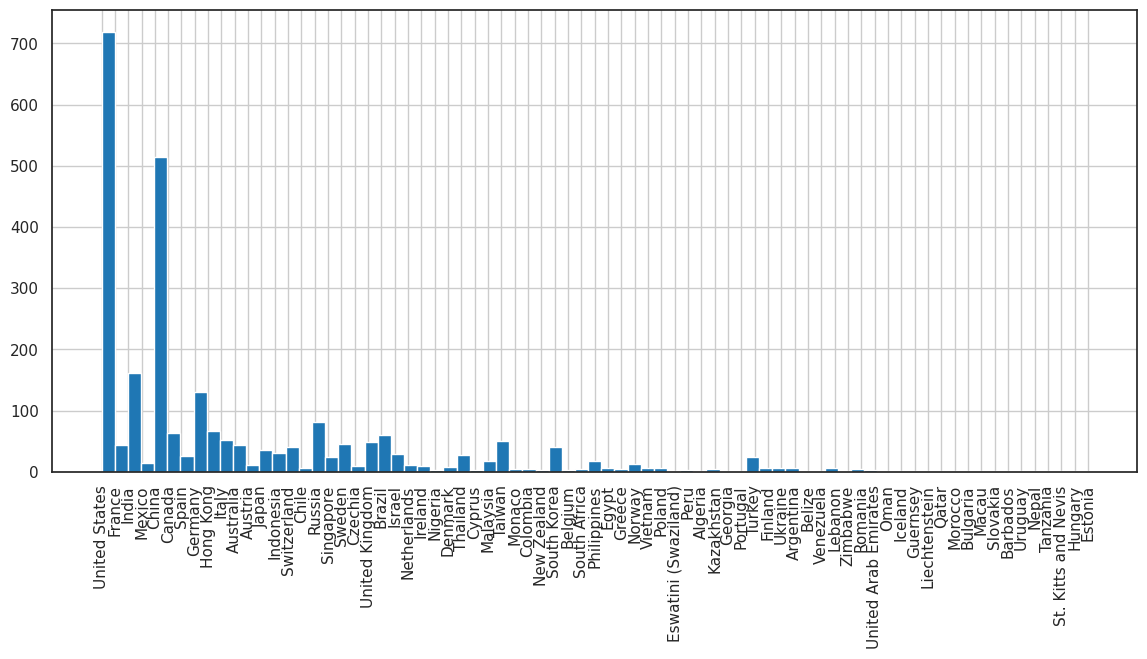

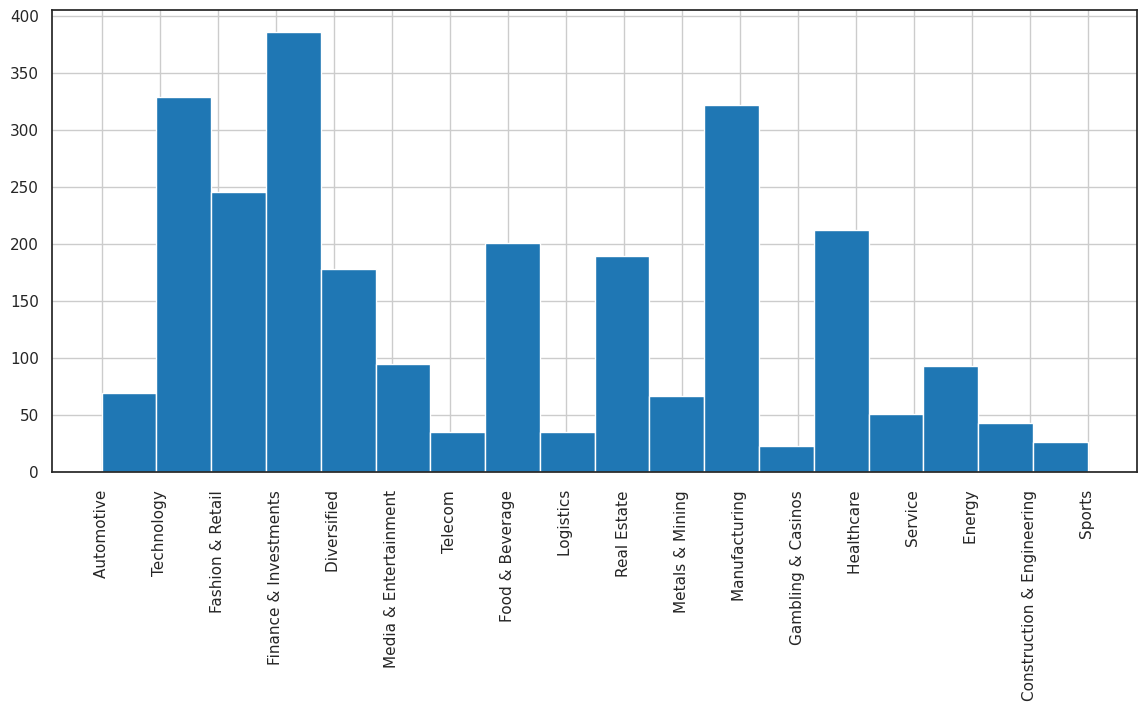

In [67]:
#  Este fragmento de código realiza un bucle (loop) para cada columna en la lista ['country','industry'] del DataFrame df.
for column in ['country','industry']:

    # Para cada columna, se crea una nueva figura (plt.figure(figsize = (14, 6))) con un tamaño de 14 por 6 pulgadas.
    plt.figure(figsize = (14, 6))

    # Se calcula la cantidad de valores únicos en la columna y se almacena en la variable n.
    n = len(df[column].unique())

    # Se traza un histograma de la columna utilizando el método hist() de pandas, y se especifica el número de divisiones (bins = n), que será igual a la cantidad de valores únicos en la columna.
    df[column].hist(bins = n)

    # Se rotan las etiquetas del eje x en sentido vertical para que sean legibles (plt.xticks(rotation = 'vertical')).
    plt.xticks(rotation = 'vertical')

    # se muestra el gráfico utilizando plt.show()
    plt.show()

    # se deja un espacio
    print("\n\n")

We can see that in this dataset, certain countries and industries contain more billionaires than others.

$ \ $

$(5)$ We also examine the pairwise plot and correlation coefficient between ***`age`*** and ***`rank`***, which tells us that the two features are negatively correlated.

In [37]:
df[['age','rank']].corr()

,age,rank
age,1.000000,-0.124947
rank,-0.124947,1.000000


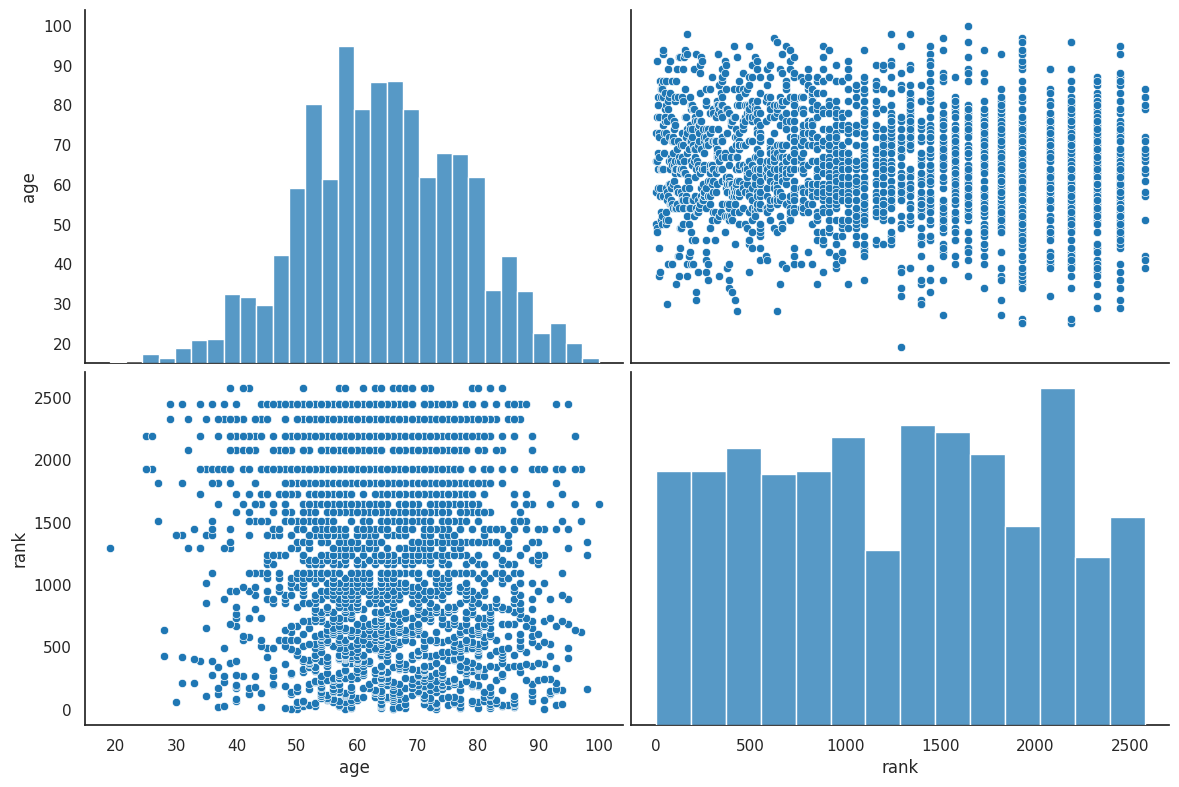

In [38]:
# Creamos una nueva variable llamada data que contiene únicamente las columnas 'age' y 'rank' del DataFrame df. Esto se logra mediante df[['age', 'rank']], que selecciona las columnas deseadas y crea un nuevo DataFrame con estas columnas.
data = df[['age','rank']]

# Crear una matriz de gráficos de dispersión (scatter plots) utilizando el DataFrame data. Cada gráfico de dispersión mostrará la relación entre las variables 'age' y 'rank'.
sns.pairplot(data, height = 4, aspect = 1.5)

# mostramos el grafico creado en pantalla
plt.show()


$ \ $

$(6)$ For the variables that we don't use in prediction, we can save them separately.

In [39]:
df

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
2595,2578,Jorge Gallardo Ballart,$1 B,80,Spain,pharmaceuticals,Healthcare
2596,2578,Nari Genomal,$1 B,82,Philippines,apparel,Fashion & Retail
2597,2578,Ramesh Genomal,$1 B,71,Philippines,apparel,Fashion & Retail
2598,2578,Sunder Genomal,$1 B,68,Philippines,garments,Fashion & Retail


In [40]:
B_names = df['name']


networths = df['networth']


sources = df['source']


industrys = df['industry']

$ \ $

$(7)$ We assign `rank`  to  `y`, our target, for prediction.


In [41]:
y = df['rank']
y.head()

0    1
1    2
2    3
3    4
4    5
Name: rank, dtype: int64

$ \ $

$(8)$ Let's drop all the features we are not going to use for the task.

In [42]:
df.drop(columns = ['name','networth','source'], inplace = True)
df.head()

,rank,age,country,industry
0,1,50,United States,Automotive
1,2,58,United States,Technology
2,3,73,France,Fashion & Retail
3,4,66,United States,Technology
4,5,91,United States,Finance & Investments


$ \ $

$(9)$ Since our categorical variables `country` and `industry` are not ordinal, meaning that the categories don't have a specific order, we utilize one-hot encoding to convert their levels into dummy variables. Other remaining variables in the dataset don't require this, so we specify `remainder = "passthrough"` to exclude them from the encoding.

In [43]:
# Creamos una instancia del objeto ColumnTransformer llamado one_hot. Esto se utiliza para aplicar transformaciones específicas a las columnas seleccionadas del DataFrame.
# El parámetro transformers especifica las transformaciones a aplicar. En este caso, se utiliza ("one_hot", OneHotEncoder(), ['country', 'industry']). Esto indica que se aplicará una transformación "one-hot encoding" utilizando el objeto OneHotEncoder() a las columnas 'country' e 'industry'.
# El parámetro remainder se establece en "passthrough" para indicar que las columnas no seleccionadas se deben pasar sin cambios al resultado final.
one_hot = ColumnTransformer(transformers = [("one_hot", OneHotEncoder(), ['country','industry'])], remainder = "passthrough")

# En la segunda línea, se aplica la transformación utilizando one_hot.fit_transform(df). Esto ajusta el ColumnTransformer a los datos del DataFrame df y transforma el DataFrame completo de acuerdo con las especificaciones dadas
data = one_hot.fit_transform(df)

$ \ $

$(10)$ The previous output is a NumPy array, so let's get the feature names from the `one_hot` object using the method `get_feature_names_out()`, which will give  us the feature name with the name of the transformer as a prefix. For one-hot encoding, the prefix will also include the name of the column that generated the feature. Hence, we can strip out the prefix of the string for column names and save the labelled array as a dataframe.


In [44]:
# Obtienemos los nombres de las columnas que resultan de la transformación one-hot encoding utilizando el método get_feature_names_out() del objeto one_hot.
names = one_hot.get_feature_names_out()
names

array(['one_hot__country_Algeria', 'one_hot__country_Argentina',
       'one_hot__country_Australia', 'one_hot__country_Austria',
       'one_hot__country_Barbados', 'one_hot__country_Belgium',
       'one_hot__country_Belize', 'one_hot__country_Brazil',
       'one_hot__country_Bulgaria', 'one_hot__country_Canada',
       'one_hot__country_Chile', 'one_hot__country_China',
       'one_hot__country_Colombia', 'one_hot__country_Cyprus',
       'one_hot__country_Czechia', 'one_hot__country_Denmark',
       'one_hot__country_Egypt', 'one_hot__country_Estonia',
       'one_hot__country_Eswatini (Swaziland)',
       'one_hot__country_Finland', 'one_hot__country_France',
       'one_hot__country_Georgia', 'one_hot__country_Germany',
       'one_hot__country_Greece', 'one_hot__country_Guernsey',
       'one_hot__country_Hong Kong', 'one_hot__country_Hungary',
       'one_hot__country_Iceland', 'one_hot__country_India',
       'one_hot__country_Indonesia', 'one_hot__country_Ireland',
       'o

In [45]:
# creamos una lisa que se utilizará para almacenar los nombres de las columnas después del primer procesamiento.
lista_1 = []

# iteramos sobre los nombres de las columnas en names
for name in names:

  # utiliza el método find("__") para encontrar la posición de inicio de la subcadena "__" en cada nombre
  indice = name.find("__") + 2

  # agrega a lista_1 la parte del nombre después de la subcadena "__".
  lista_1.append(name[indice:])


# --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# creamos una lista vacía llamada que se utilizará para almacenar los nombres de las columnas después del segundo procesamiento.
lista_2 = []

# iteramos sobre los nombres de las columnas en lista_1
for name in lista_1:

  # Utilizamos el método find("_") para encontrar la posición de inicio de la subcadena "_" en cada nombre.
  indice = name.find("_") + 1

  # Agregamos a lista_2 la parte del nombre después de la subcadena "_".
  lista_2.append(name[indice:])


In [46]:
# Asignamos la lista lista_2 a la variable column_names, que contiene los nombres de las columnas procesadas después de la transformación one-hot encoding.
column_names = lista_2

# creamos un nuevo DataFrame llamado new_data utilizando pd.DataFrame(). La transformación data.toarray() se aplica para convertir los datos transformados en una matriz (array). Se utilizan los nombres de las columnas de column_names como los nombres de las columnas del DataFrame.
new_data = pd.DataFrame(data.toarray(), columns = column_names)

# Mostramos los primeros 5 renglones de new_data
new_data.head()

,Algeria,Argentina,Australia,Austria,Barbados,Belgium,Belize,Brazil,Bulgaria,Canada,...,Manufacturing,Media & Entertainment,Metals & Mining,Real Estate,Service,Sports,Technology,Telecom,rank,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,50.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,58.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,73.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,66.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,91.0


$ \ $

------

## ***Applying Kernel PCA***

$ \ $

$(1)$ Let's define a Kernel PCA object and fit it on this new data.

In [47]:
# creamos una instancia del objeto KernelPCA con un kernel radial (RBF) y ajustamos el modelo a los datos de entrada (new_data).
kernel_pca = KernelPCA(kernel = "rbf", fit_inverse_transform = True, alpha = 0.1)

# realizamos la transformación de los datos utilizando el modelo ajustado
kernel_score = kernel_pca.fit_transform(new_data)

$ \ $

$(2)$ By plotting out the projection on the first two principal components and overlaying the plot with rank as the color, we are able to see a two dimensional visualization of the dataset, which can help distinguish any clusters that may be present in rankings. Here, the variable `ranking` was also defined, which will label the plot with the industry of the individual with that ranking value.


In [48]:
ranking = 13

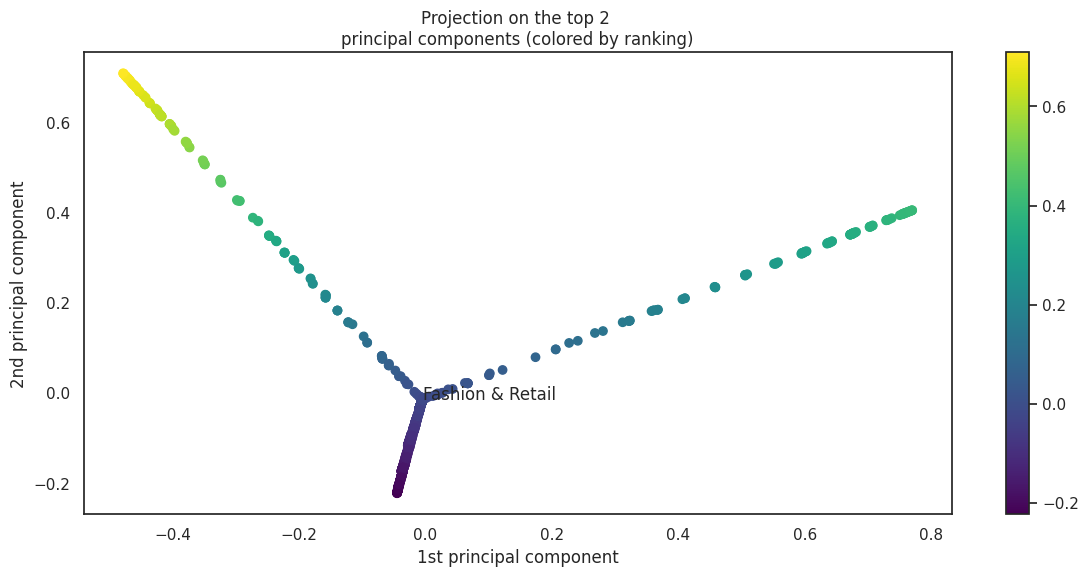

In [49]:
# Se crea una figura y un conjunto de ejes utilizando la función subplots().
fig, ax = plt.subplots(figsize = (14, 6))

# Se realiza un diagrama de dispersión utilizando los valores del primer y segundo componente principal obtenidos anteriormente.
# Los puntos se colorean según la variable 'y' utilizando el mapa de colores 'viridis'.
x = kernel_score[:, 0]
y = kernel_score[:, 1]
sc = ax.scatter(x, y, c = y, cmap = 'viridis')

# Se agrega una barra de color a la figura para mostrar la escala de colores correspondiente a los valores de 'y'.
fig.colorbar(sc, orientation = 'vertical')

# Se agrega una anotación al gráfico para resaltar el punto correspondiente al índice 'ranking'.
# La función annotate() toma como argumentos la etiqueta de texto y las coordenadas del punto a anotar.
etiqueta = industrys[ranking]
coordenadas = (kernel_score[ranking, 0], kernel_score[ranking, 1])
ax.annotate(etiqueta, coordenadas)

# Se establecen etiquetas para los ejes x e y.
plt.xlabel("1st principal component")
plt.ylabel("2nd principal component")

# Se establece un título para el gráfico.
plt.title("Projection on the top 2 \nprincipal components (colored by ranking)")

# Se muestra el gráfico.
plt.show()

$ \ $

$(3)$ We see a Bifurcation of the data dependent on the rank. The diverging branches suggest that difference in ranking can be associated with certain patterns in the data. This becomes more apparent in the $3$-dimensional projection space.

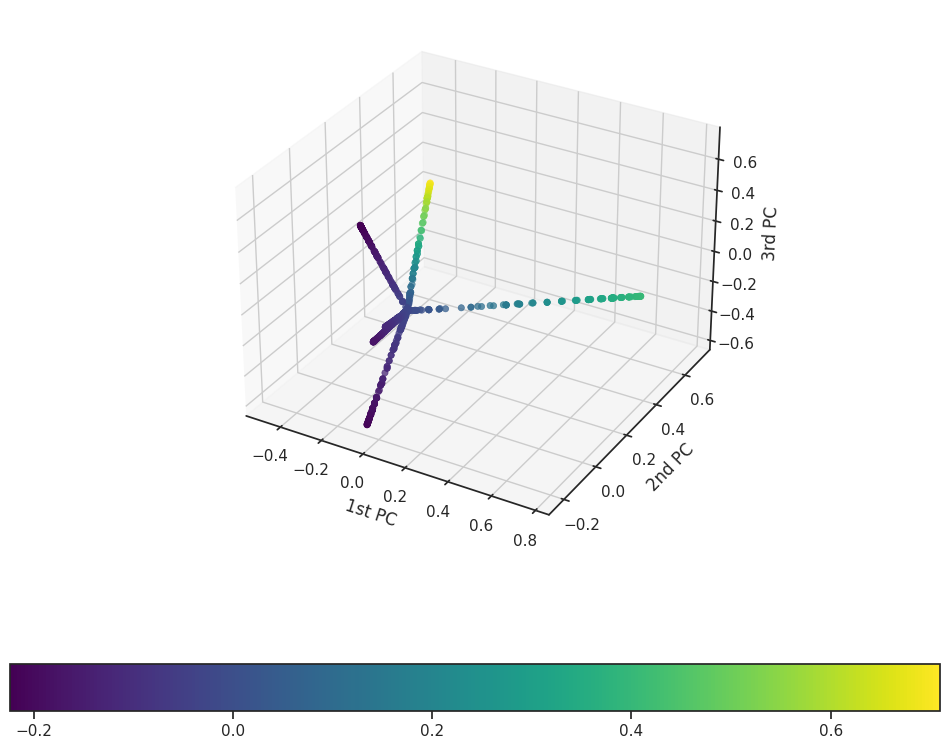

In [50]:
# Se crea una nueva figura utilizando la función figure().
fig = plt.figure(figsize = (12, 10))

# Se agrega un conjunto de ejes en 3D a la figura utilizando la función add_subplot().
ax = fig.add_subplot(projection = '3d')

# Se realiza un diagrama de dispersión en 3D utilizando los valores de los tres primeros componentes principales obtenidos anteriormente.
# Los puntos se colorean según la variable 'y' utilizando el mapa de colores 'viridis' y se establece el grosor de los bordes de los puntos en 0.5.
x_ = kernel_score[:, 0]
y_ = kernel_score[:, 1]
z_ = kernel_score[:, 2]
sc = ax.scatter(x_, y_, z_, c = y, cmap = 'viridis', linewidth = 0.5)


# Se agrega una barra de color horizontal a la figura para mostrar la escala de colores correspondiente a los valores de 'y'.
fig.colorbar(sc, orientation='horizontal')

# Se establecen etiquetas para los ejes x, y, y z.
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')

# Se muestra el gráfico en 3D.
plt.show()

Each line corresponds to a different range of ranking (represented by the varying colors).


$ \ $

$(4)$ Let's see what happens when we apply $PCA$ and plot the projection space in $1, 2$ and $3$ dimensions respectively.

In [51]:
# Se crea una instancia del objeto PCA.
pca = PCA()

# Se realiza la transformación de los datos utilizando el método fit_transform() del objeto PCA.
# Esto calcula los componentes principales y transforma los datos al espacio de los componentes principales.
score_pca = pca.fit_transform(new_data)

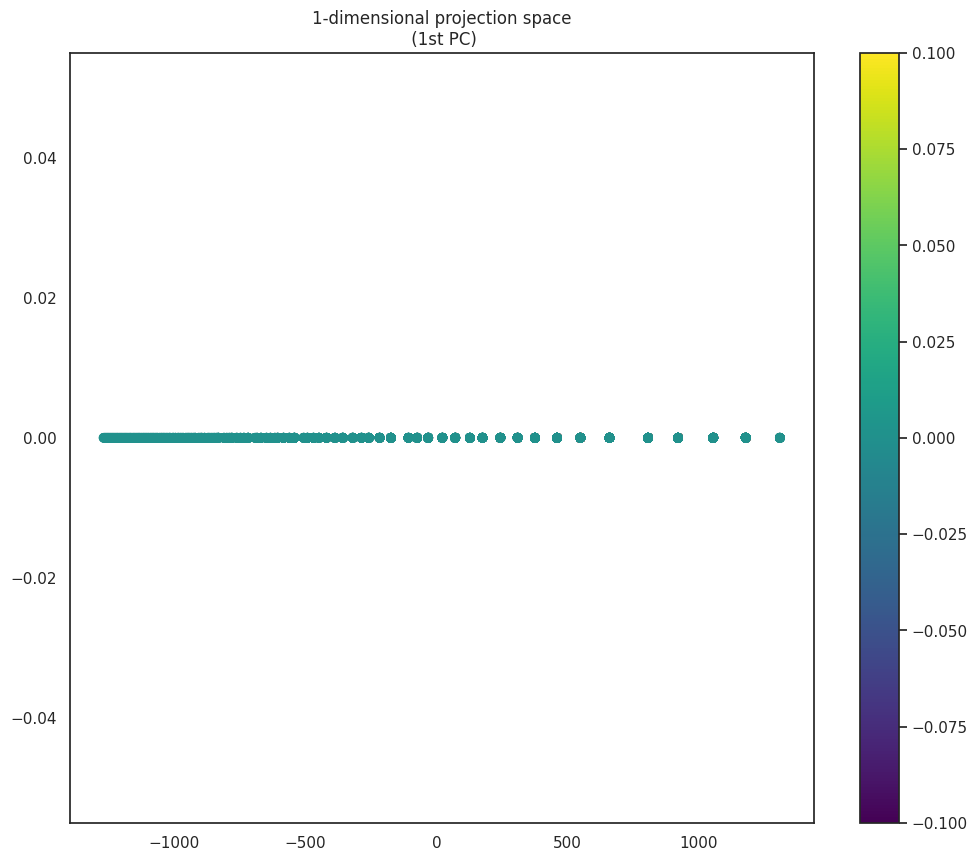

In [52]:
# Se crea una figura y un conjunto de ejes utilizando la función subplots().
fig, ax = plt.subplots(figsize = (12, 10))

# Se realiza un diagrama de dispersión utilizando los valores del primer componente principal (PC) y un array de ceros con la misma forma que el segundo componente principal.
# Los puntos se colorean según la variable 'y' utilizando el mapa de colores 'viridis'.
shape = score_pca[:, 1].shape
x = score_pca[:, 0]
y = np.zeros(shape)
sc = ax.scatter(x, y, c = y, cmap = 'viridis')

# Se establece un título para el gráfico.
ax.set_title('1-dimensional projection space\n (1st PC)')

# Se agrega una barra de color a la figura para mostrar la escala de colores correspondiente a los valores de 'y'.
fig.colorbar(sc, orientation = 'vertical')

# Se muestra el gráfico.
plt.show()

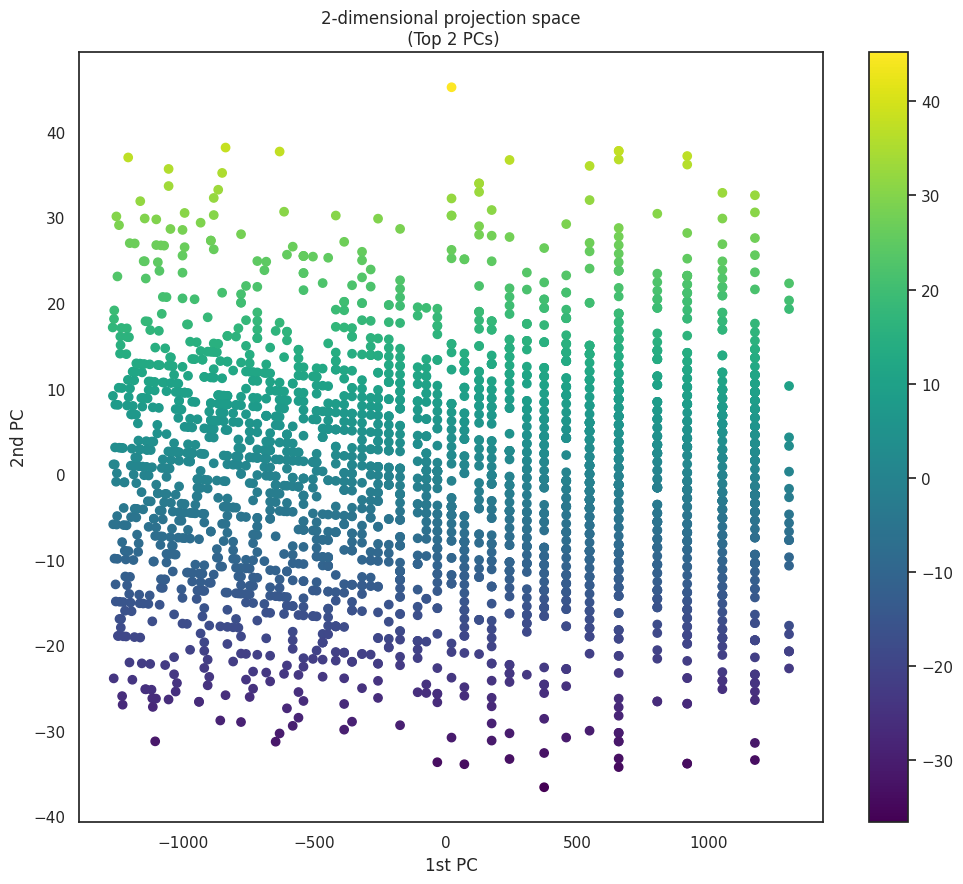

In [53]:
# Se crea una figura y un conjunto de ejes utilizando la función subplots().
fig, ax = plt.subplots(figsize = (12, 10))

# Se realiza un diagrama de dispersión utilizando los valores del primer y segundo componente principal obtenidos anteriormente.
# Los puntos se colorean según la variable 'y' utilizando el mapa de colores 'viridis'.
x = score_pca[:, 0]
y = score_pca[:, 1]
sc = ax.scatter(x, y, c = y, cmap = 'viridis')

# Se agrega una barra de color a la figura para mostrar la escala de colores correspondiente a los valores de 'y'.
fig.colorbar(sc, orientation = 'vertical')

# Se establece un título para el gráfico.
ax.set_title('2-dimensional projection space\n (Top 2 PCs)')

# Se establecen etiquetas para los ejes x e y.
plt.xlabel("1st PC")
plt.ylabel("2nd PC")

# Se muestra el gráfico.
plt.show()

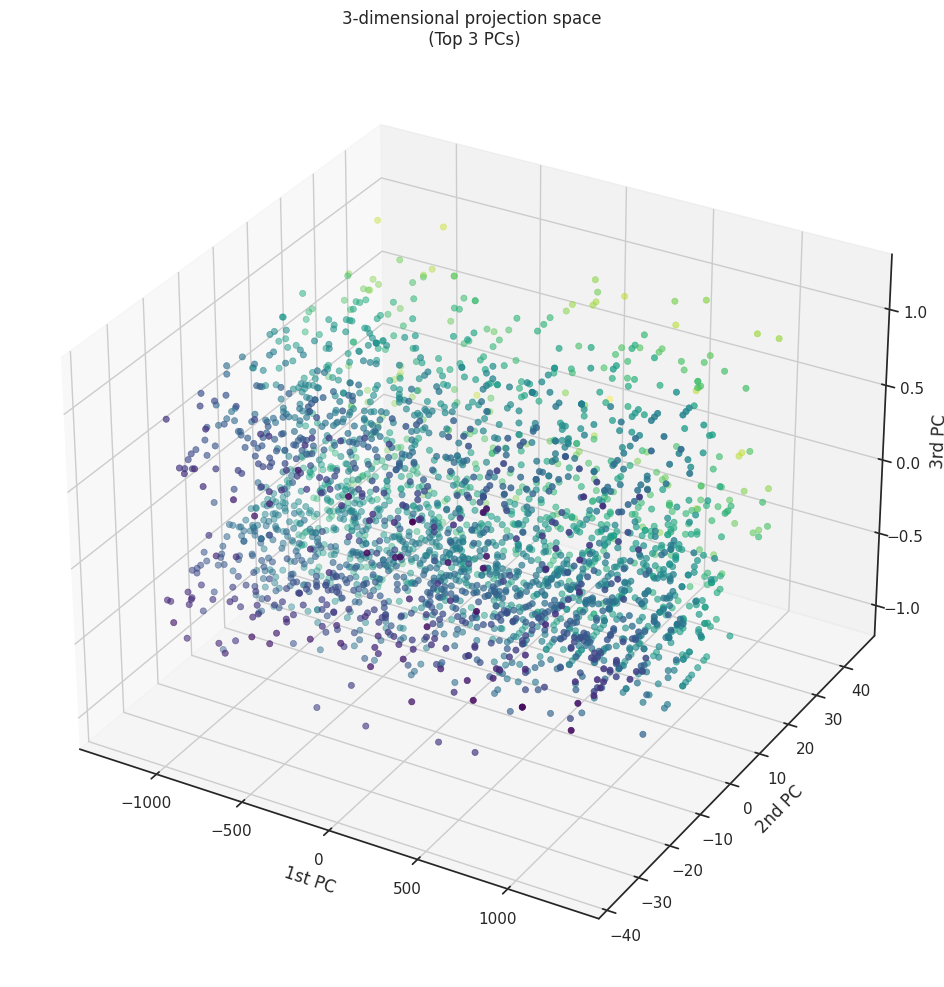

In [54]:
# Se crea una nueva figura utilizando la función figure().
fig = plt.figure(figsize = (12, 12))

# Se agrega un conjunto de ejes en 3D a la figura utilizando la función add_subplot().
ax = fig.add_subplot(projection='3d')

# Se realiza un diagrama de dispersión en 3D utilizando los valores de los tres primeros componentes principales obtenidos anteriormente.
# Los puntos se colorean según la variable 'y' utilizando el mapa de colores 'viridis' y se establece el grosor de los bordes de los puntos en 0.5.
x_ = score_pca[:, 0]
y_ = score_pca[:, 1]
z_ = score_pca[:, 2]
sc = ax.scatter(x_, y_, z_, c = y, cmap = 'viridis', linewidth = 0.5)

# Se establece un título para el gráfico.
ax.set_title('3-dimensional projection space\n (Top 3 PCs)')

# Se establecen etiquetas para los ejes x, y, y z.
ax.set_xlabel('1st PC')
ax.set_ylabel('2nd PC')
ax.set_zlabel('3rd PC')

# Se muestra el gráfico en 3D.
plt.show()


In the $2$-dimensional and $3$-dimensional projection space, we see a similar trend that rankings change across the $x$-axis, meaning that most of its variation occurs in the projection on the first principal component. From this example, we can observe that surely, some combination of the features `country`, `industry`, and `age` leads to consistent change in rankings. It is important to note that due to the nature of $PCA$, in general, we aren't able to decrypt what that combination is.

$ \ $

-----

## ***Using Kernel PCA to Improve Prediction***

$ \ $

Even though we can't extract information that $PCA$ deems to be a significant pattern, we can still feed the transformed features into a prediction model. When we compare Kernel $PCA$ and $PCA$, we see that Kernel $PCA$ generally performs better given a higher $\mathbb{R}^{2}$ (coefficient of determination) score on the test set.

In [55]:
# Se divide el conjunto de datos de los componentes principales obtenidos mediante Kernel PCA en conjuntos de entrenamiento y prueba.
# Se utiliza la función train_test_split() de scikit-learn, donde se especifica la proporción del conjunto de prueba (test_size) y una semilla aleatoria (random_state).
X_train, X_test, y_train, y_test = train_test_split(kernel_score, y, test_size = 0.4, random_state = 0)

# Se crea una instancia del modelo de regresión Ridge utilizando la clase Ridge de scikit-learn.
# Se establece el parámetro alpha en 0 para obtener la solución óptima sin regularización.
lr = Ridge(alpha = 0).fit(X_train, y_train)

# Se calcula el coeficiente de determinación R^2 para el modelo de regresión Ridge en el conjunto de prueba utilizando la función score().
# El coeficiente de determinación es una medida de cuánta varianza se explica por el modelo en relación con la varianza total de los datos.
score = lr.score(X_test, y_test)

# Se imprime el valor del coeficiente de determinación R^2 para el modelo de regresión Ridge en el conjunto de prueba.
print(f"Test set R^2 score for Kernel PCA: {score}")


Test set R^2 score for Kernel PCA: 0.9068688011940513


In [56]:
# Se divide el conjunto de datos de los componentes principales obtenidos mediante PCA en conjuntos de entrenamiento y prueba.
# Se utiliza la función train_test_split() de scikit-learn, donde se especifica la proporción del conjunto de prueba (test_size) y una semilla aleatoria (random_state).
X_train, X_test, y_train, y_test = train_test_split(score_pca, y, test_size = 0.40, random_state = 0)

# Se crea una instancia del modelo de regresión Ridge utilizando la clase Ridge de scikit-learn.
# Se establece el parámetro alpha en 0 para obtener la solución óptima sin regularización.
lr = Ridge(alpha = 0).fit(X_train, y_train)

# Se calcula el coeficiente de determinación R^2 para el modelo de regresión Ridge en el conjunto de prueba utilizando la función score().
# El coeficiente de determinación es una medida de cuánta varianza se explica por el modelo en relación con la varianza total de los datos.
score = lr.score(X_test, y_test)

# Se imprime el valor del coeficiente de determinación R^2 para el modelo de regresión Ridge en el conjunto de prueba.
print(f"Test set R^2 score for PCA: {score}")


Test set R^2 score for PCA: 0.9973735769971015


$ \ $

------

## ***Exercise***

$ \ $

You may now wonder, "What's the use in prediction, if we don't know which variables matter the most or what the significant split value is?" Depending on the task type, we don't always need to know that to produce interpretable results. Image datasets are one such case - in the following exercises, you will take advantage of dimension reduction to compare how well $PCA$ and Kernel $PCA$ remove noise in images while still retaining its key features.

$ \ $

$(1)$ We load the necessary train and test data, which are created using the USPS digits dataset that have been modified to include noise. In the image below, you can see that the digits are fairly hard to see clearly.

In [57]:
# Se especifica la URL del archivo CSV que contiene los datos de entrenamiento ruidosos.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_train_noisy.csv'

# Se lee el archivo CSV utilizando la función read_csv() de pandas y se convierte en una matriz numpy utilizando el método to_numpy().
X_train_noisy = pd.read_csv(url).to_numpy()

In [58]:
# Se especifica la URL del archivo CSV que contiene los datos de prueba ruidosos.
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/X_test_noisy.csv'

# Se lee el archivo CSV utilizando la función read_csv() de pandas y se convierte en una matriz numpy utilizando el método to_numpy().
X_test_noisy = pd.read_csv(url).to_numpy()

In [59]:
# Función auxiliar para trazar las imágenes de los dígitos
def plot_digits(X, title):

    """Pequeña función auxiliar para trazar 100 dígitos."""

    # Se crea una figura con una matriz de subgráficos de 10x10, con un tamaño de 8x8 pulgadas.
    fig, axs = plt.subplots(nrows = 10, ncols = 10, figsize = (8, 8))

    # Se itera sobre cada imagen y su correspondiente subgráfico, utilizando la función zip().
    # zip() combina los elementos de dos iterables en una tupla.
    for img, ax in zip(X, axs.ravel()):

        # Se muestra la imagen en el subgráfico utilizando el método imshow() de Matplotlib.
        # La imagen se redimensiona a 16x16 píxeles
        imagen = img.reshape((16, 16))

        # Mostramos la imagen con mapa de colores establecido por "Greys".
        ax.imshow(imagen, cmap = "Greys")

        # Se elimina el eje de coordenadas del subgráfico.
        ax.axis("off")

    # Se agrega un título a la figura.
    fig.suptitle(title, fontsize = 24)

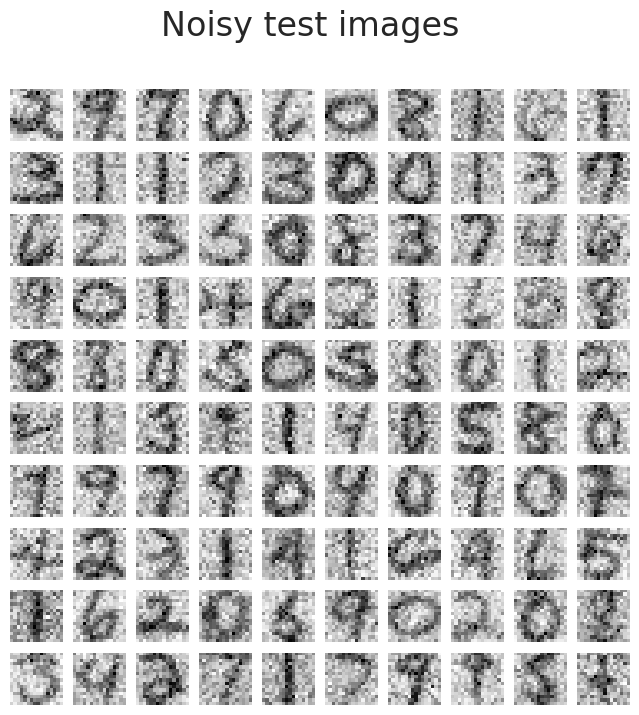

In [60]:
# Se llama a la función plot_digits() para trazar las imágenes de los dígitos de prueba ruidosos.
plot_digits(X_test_noisy, "Noisy test images")

$ \ $

$(2)$ Create a `PCA` object called `pca` and fit it to the noisy test set `X_test_noisy`.


In [61]:
# Se crea una instancia de la clase PCA con n_components=35, lo que indica que se desean obtener los primeros 35 componentes principales.
pca = PCA(n_components = 35)

# Se ajusta el modelo de PCA utilizando los datos de entrenamiento ruidosos (X_train_noisy).
pca.fit(X_train_noisy)

PCA(n_components=35)

$ \ $

$(3)$ Create a `KernelPCA` object called  object `kernel_pca` using a RBF kernel.

In [62]:
# Se crea una instancia de la clase KernelPCA con los siguientes parámetros:
# n_components=400: indica que se desean obtener los primeros 400 componentes principales.
# kernel="rbf": utiliza una función de kernel RBF (Radial Basis Function).
# gamma=0.01: parámetro gamma para la función de kernel RBF.
# fit_inverse_transform=True: ajusta la transformación inversa para poder reconstruir los datos originales.
# alpha=0.1: hiperparámetro de regularización para el modelo de Kernel PCA.
kernel_pca = KernelPCA(n_components = 400, kernel = "rbf", gamma = 0.01, fit_inverse_transform = True, alpha = 0.1)

# Se ajusta el modelo de Kernel PCA utilizando los datos de entrenamiento ruidosos (X_train_noisy).
kernel_pca.fit(X_train_noisy)

KernelPCA(alpha=0.1, fit_inverse_transform=True, gamma=0.01, kernel='rbf',
          n_components=400)

$ \ $

$(4)$ We want to see if $PCA$ or kernel $PCA$ is better at removing noise in the original images. To do so, recall how we reconstructed the ***make_circles*** toy dataset earlier in this lab.

$\color{lightblue}{\text{Hint:}}$ apply inverse transformation to the transformed data on a lower dimension.

In [63]:
# Se reconstruyen los datos originales de prueba utilizando la transformación inversa del modelo de PCA.
X_hat_pca = pca.inverse_transform(pca.transform(X_test_noisy))

# Se reconstruyen los datos originales de prueba utilizando la transformación inversa del modelo de Kernel PCA.
X_hat_kpca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

$ \ $

$(5)$ Let's visualize the images reconstructed from PCA and kernel $PCA$. You may find the helper function ***plot_digits*** helpful.

* Which one reveals digit images with less noise?

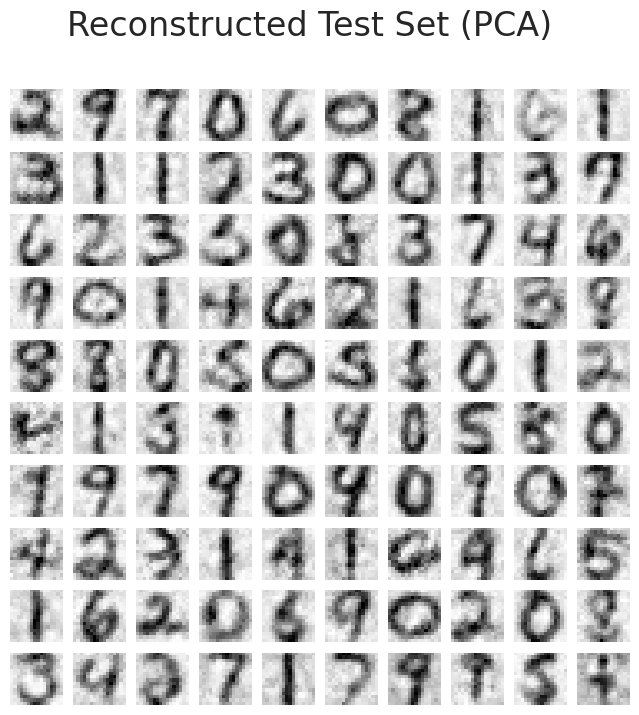

In [64]:
# Se llama a la función plot_digits para visualizar las imágenes reconstruidas utilizando el modelo de PCA.
plot_digits(X_hat_pca, "Reconstructed Test Set (PCA)")

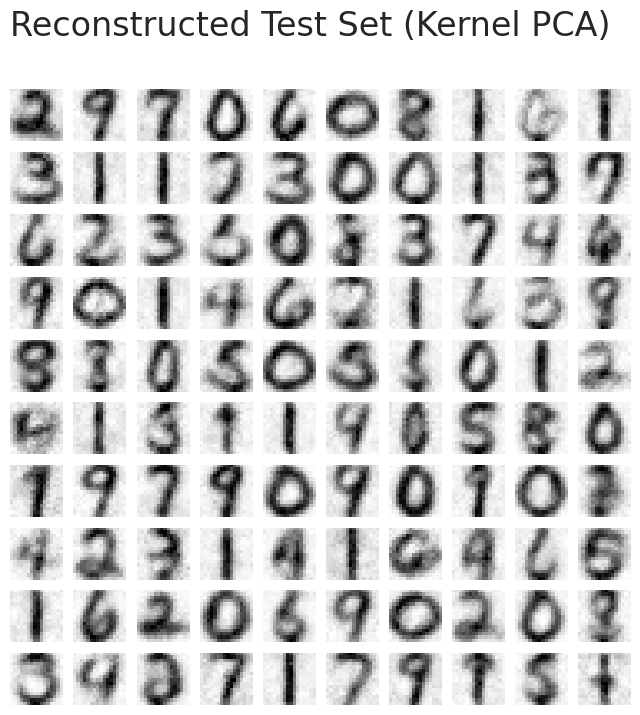

In [65]:
# Se llama a la función plot_digits para visualizar las imágenes reconstruidas utilizando el modelo de Kernel PCA.
plot_digits(X_hat_kpca, "Reconstructed Test Set (Kernel PCA)")